In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression


In [26]:
file=pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")
file.head()

Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  
0           0.22           0.17           0.11           0.39  
1           0.50           0.10           0.60           0.00  
2           1.00           0.45           0.45           0.36  
3           0.71           0.35           0.29           0.35  
4           0.13           0.53           0.33           0.40  

[5 rows x 107 columns]

In [27]:
file.describe()

W0          W1          W2          W3          W4          W5  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.902589    9.129470    9.389642    9.717633    9.574599    9.466091   
std     12.067163   12.564766   13.045073   13.553294   13.095765   12.823195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
75%     12.000000   12.000000   12.000000   13.000000   13.000000   12.500000   
max     54.000000   53.000000   56.000000   59.000000   61.000000   52.000000   

               W6          W7          W8          W9  ...  Normalized 42  \
count  811.000000  811.000000  811.000000  811.000000  ...     811.000000   
mean     9.720099    9.585697    9.784217    9.681874  ...       0.299149   
std     13.347375   13.049138   13.550237   13.137916  ...       0.266993   
min      0.000000    0.000000    0.000000    0.000000  ...       0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...       0.000000   
50%      4.000000    4.000000    4.000000    4.000000  ...       0.280000   
75%     13.000000   12.500000   13.000000   13.000000  ...       0.490000   
max     56.000000   62.000000   63.000000   52.000000  ...       1.000000   

       Normalized 43  Normalized 44  Normalized 45  Normalized 46  \
count     811.000000     811.000000     811.000000     811.000000   
mean        0.287571       0.304846       0.316017       0.334760   
std         0.256630       0.263396       0.262226       0.275203   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.020000       0.085000   
50%         0.270000       0.300000       0.310000       0.330000   
75%         0.450000       0.500000       0.500000       0.500000   
max         1.000000       1.000000       1.000000       1.000000   

       Normalized 47  Normalized 48  Normalized 49  Normalized 50  \
count     811.000000      811.00000     811.000000     811.000000   
mean        0.314636        0.33815       0.358903       0.373009   
std         0.266029        0.27569       0.286665       0.295197   
min         0.000000        0.00000       0.000000       0.000000   
25%         0.000000        0.10500       0.100000       0.110000   
50%         0.310000        0.33000       0.330000       0.350000   
75%         0.500000        0.50000       0.550000       0.560000   
max         1.000000        1.00000       1.000000       1.000000   

       Normalized 51  
count     811.000000  
mean        0.427941  
std         0.342360  
min         0.000000  
25%         0.090000  
50%         0.430000  
75%         0.670000  
max         1.000000  

[8 rows x 106 columns]

In [28]:
file.columns

Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)

In [29]:
file.dtypes

Product_Code      object
W0                 int64
W1                 int64
W2                 int64
W3                 int64
                  ...   
Normalized 47    float64
Normalized 48    float64
Normalized 49    float64
Normalized 50    float64
Normalized 51    float64
Length: 107, dtype: object

In [30]:
file.shape

(811, 107)

In [31]:
file.isnull().sum()

Product_Code     0
W0               0
W1               0
W2               0
W3               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 107, dtype: int64

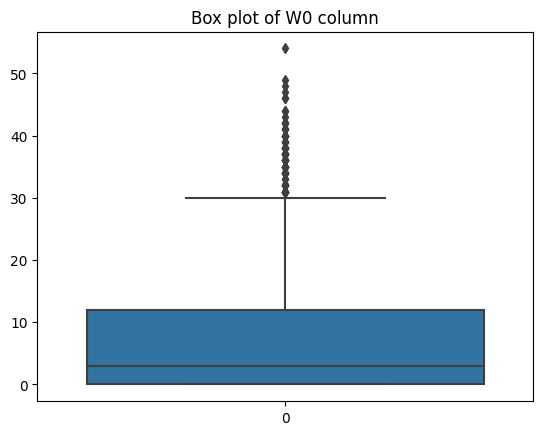

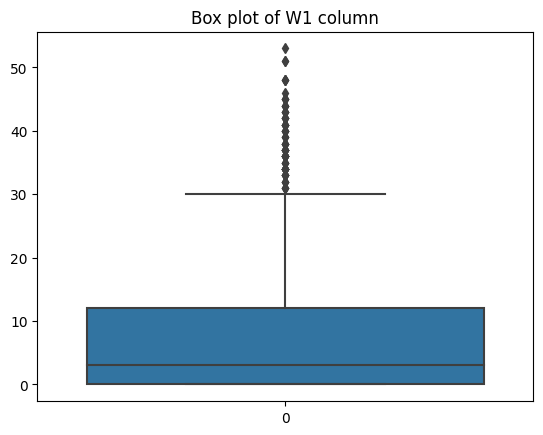

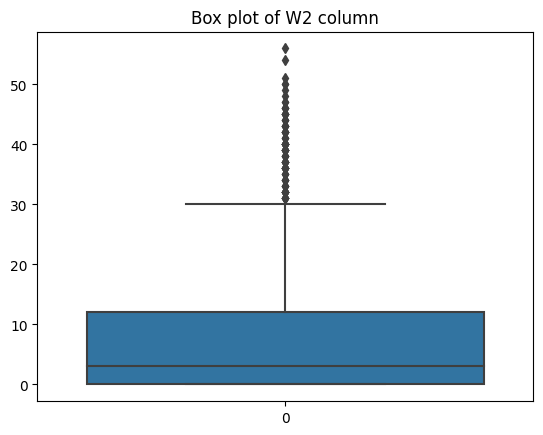

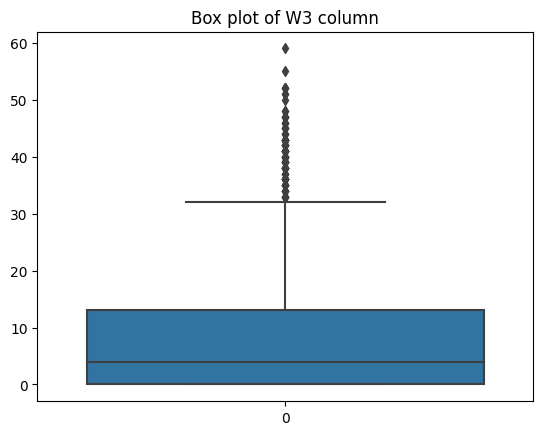

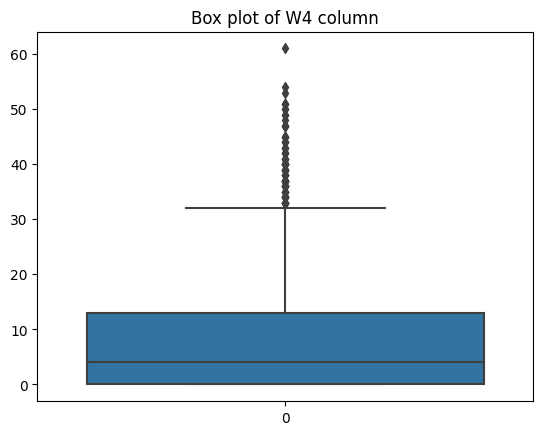

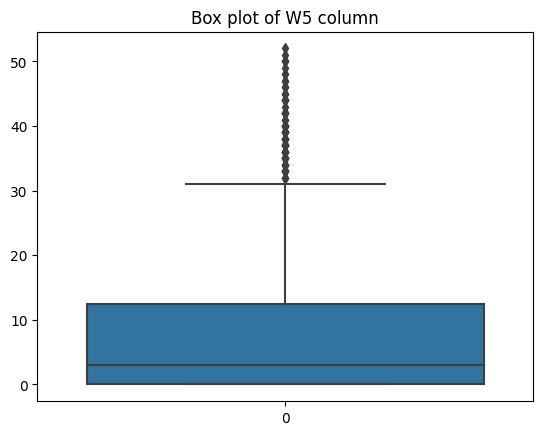

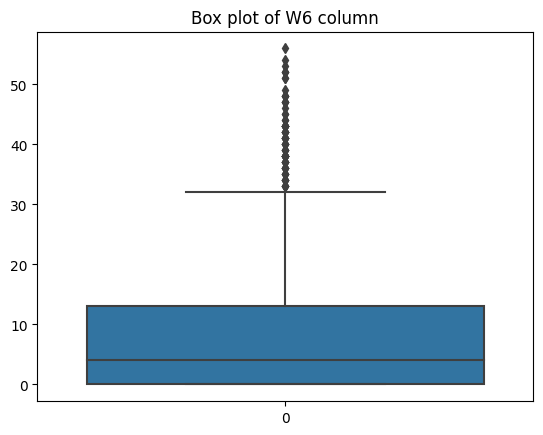

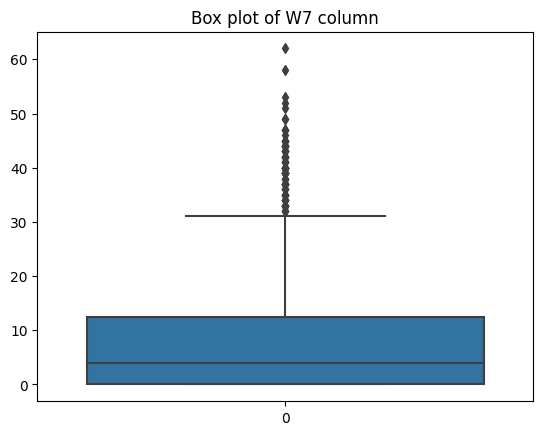

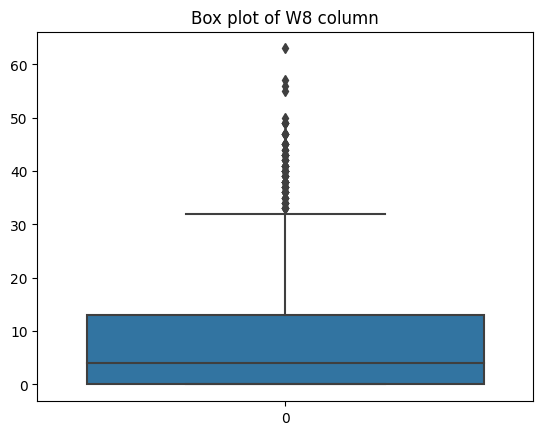

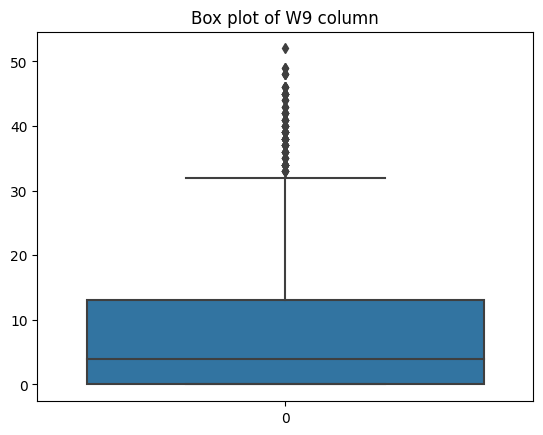

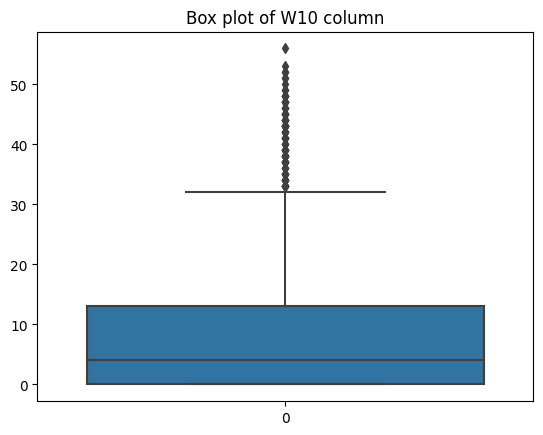

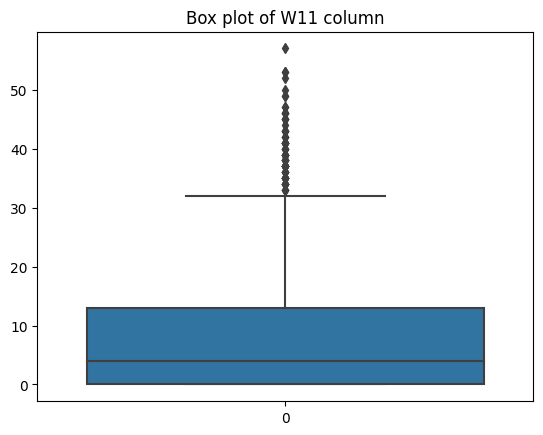

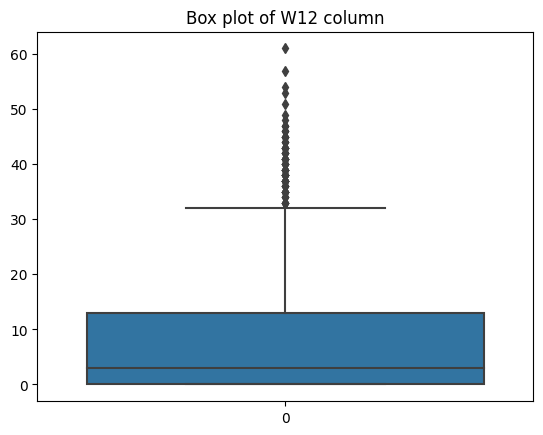

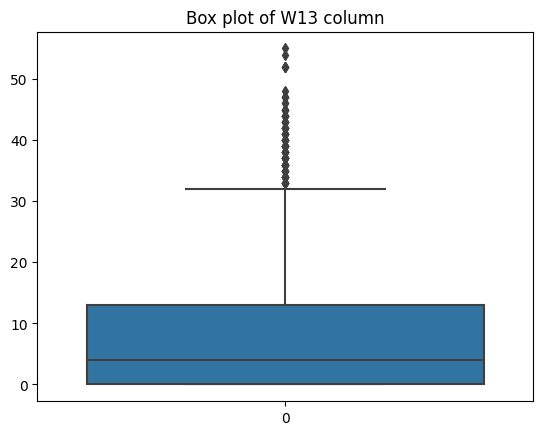

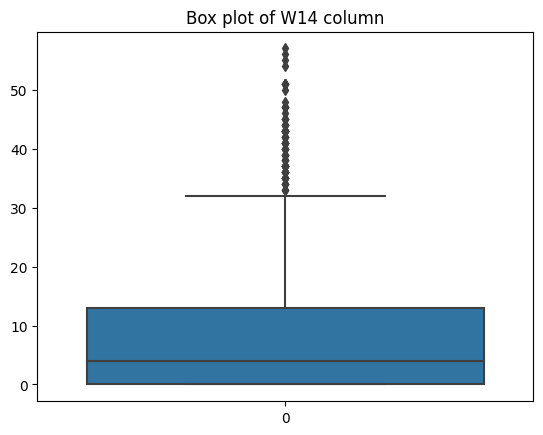

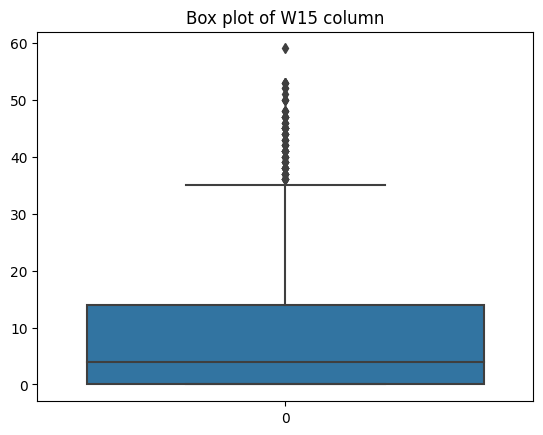

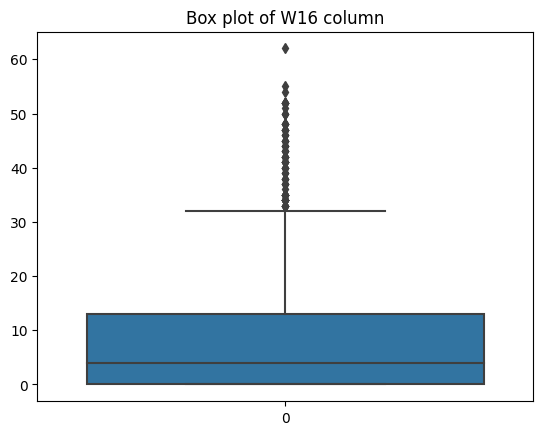

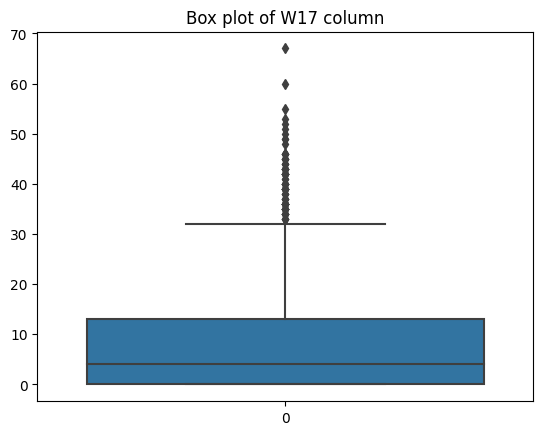

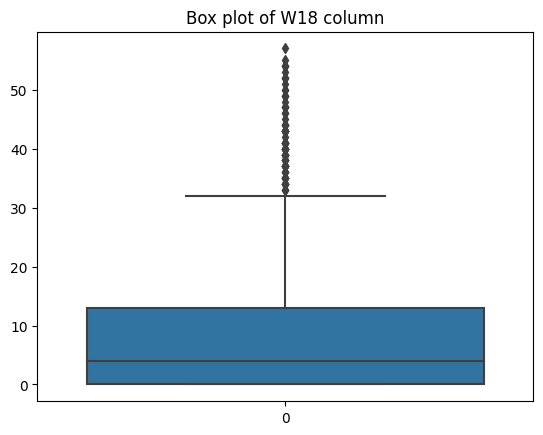

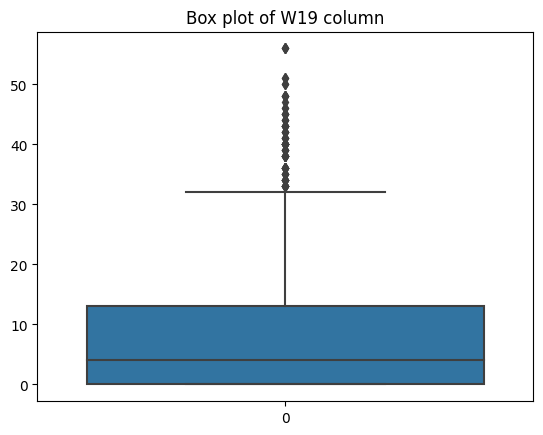

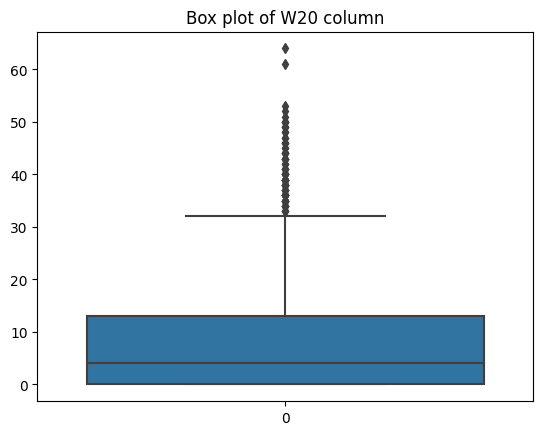

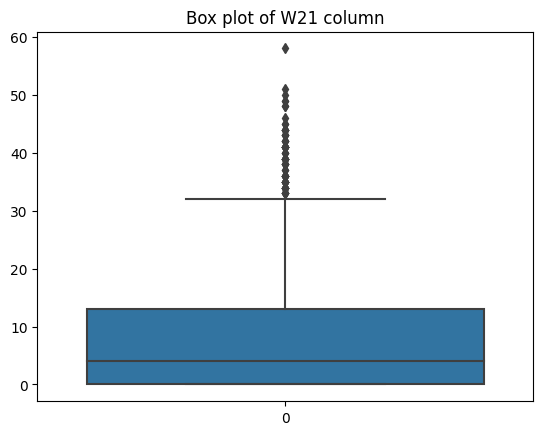

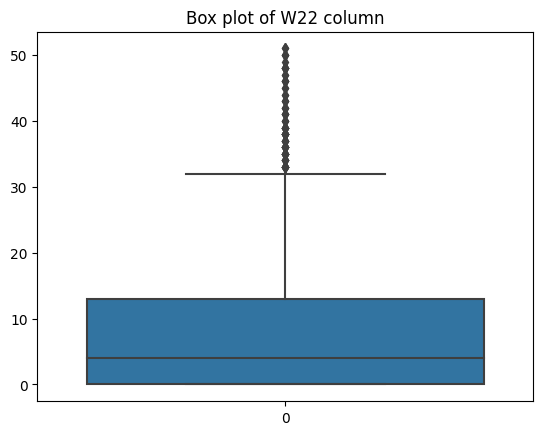

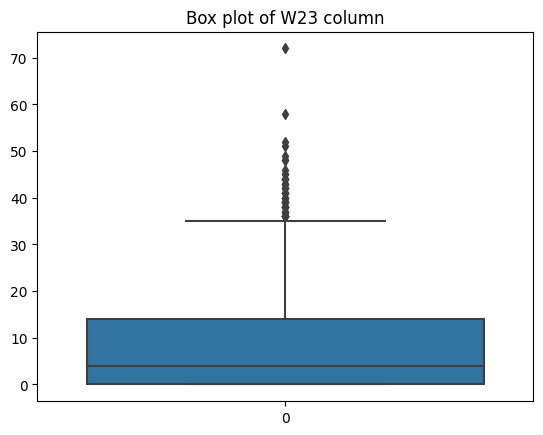

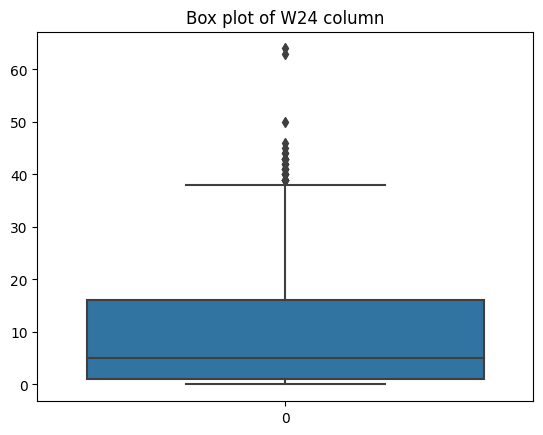

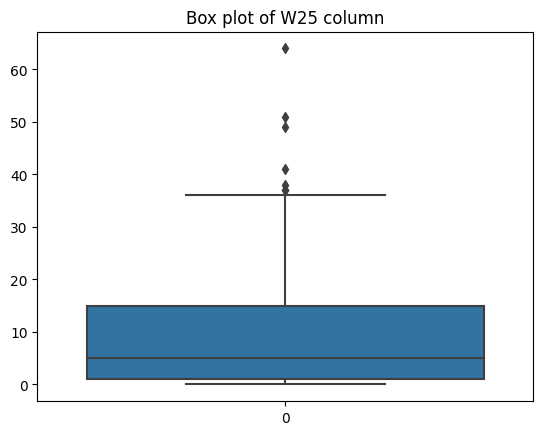

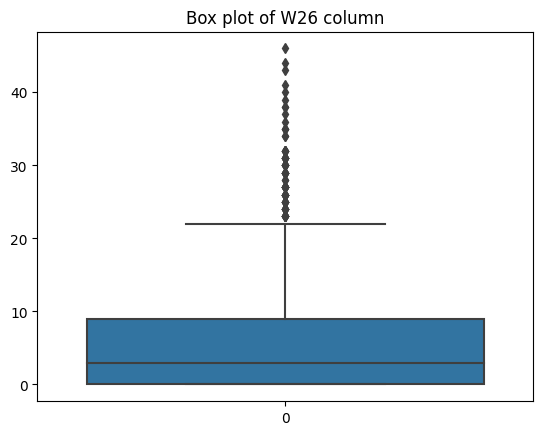

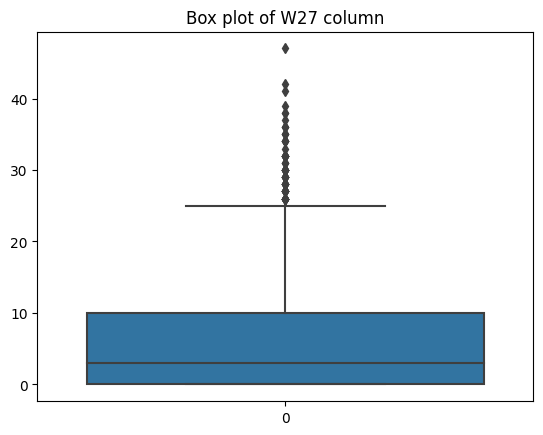

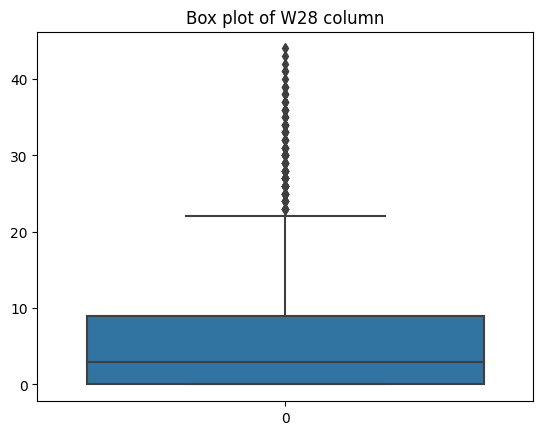

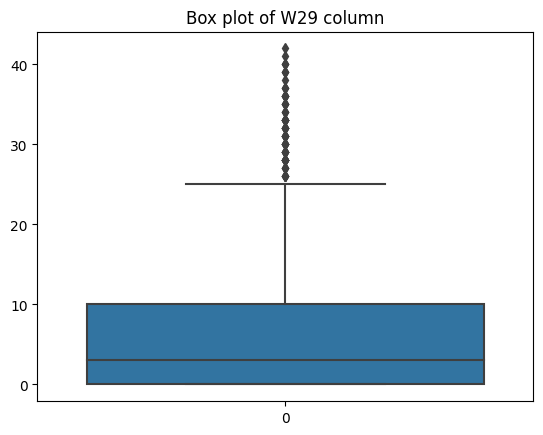

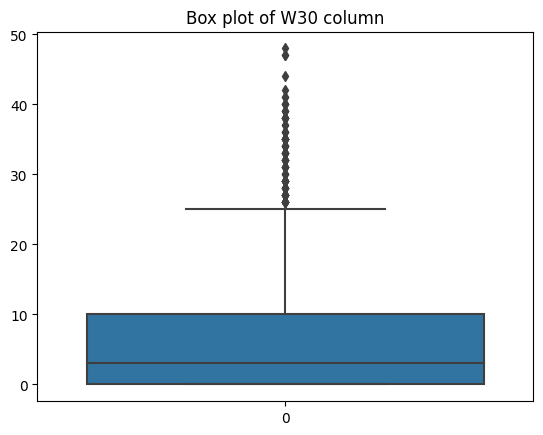

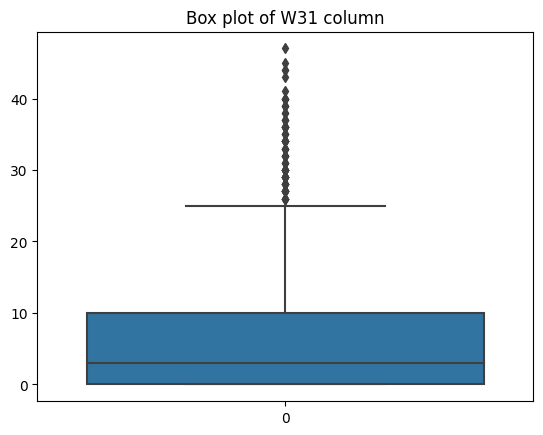

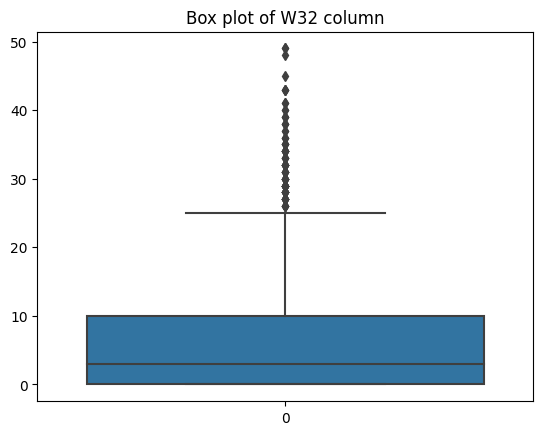

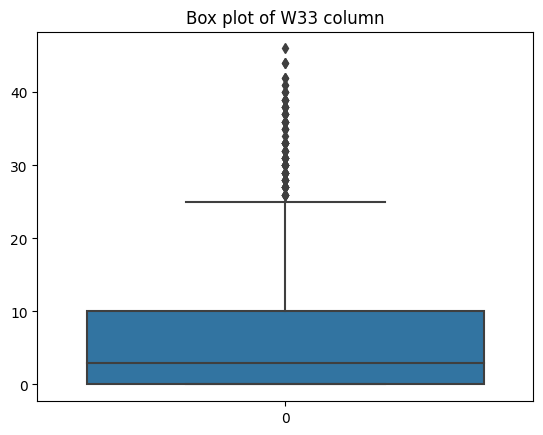

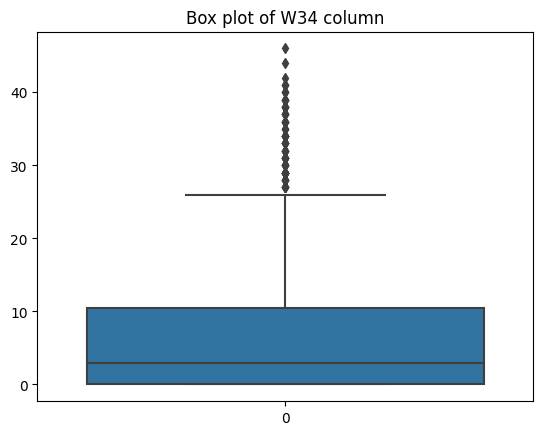

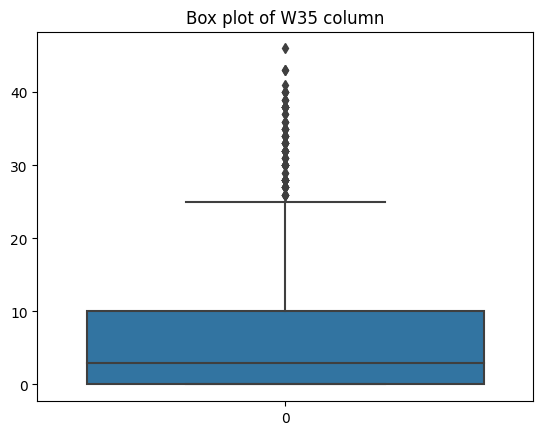

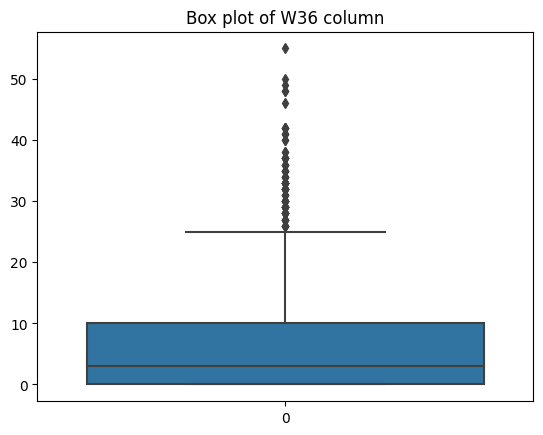

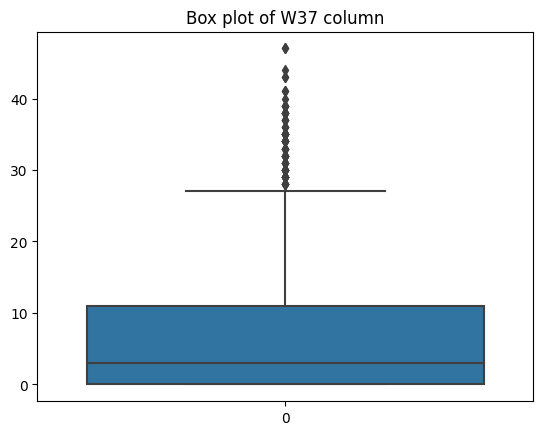

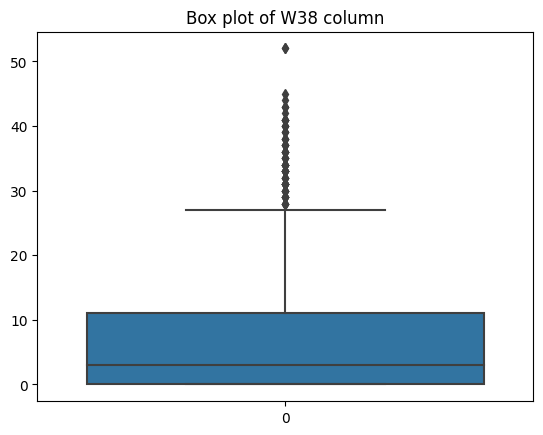

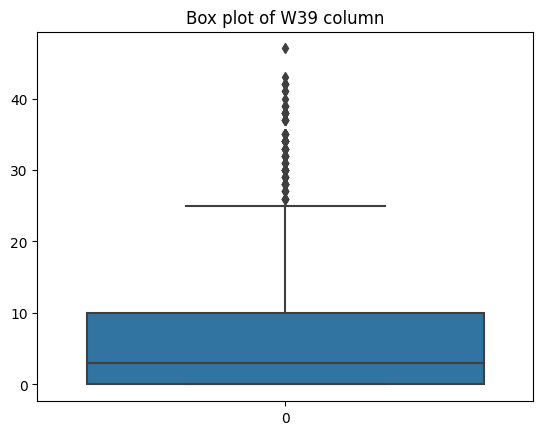

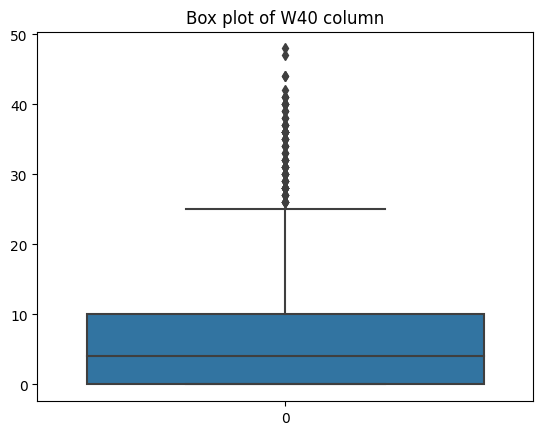

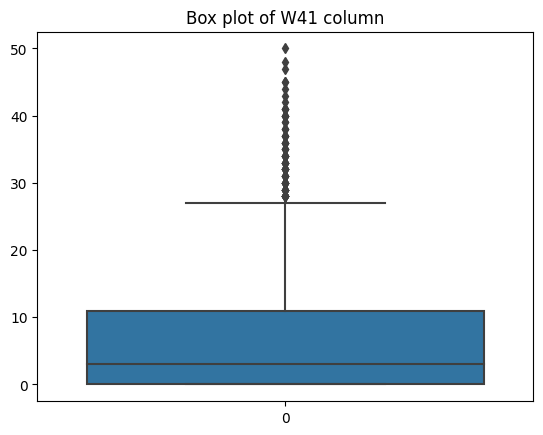

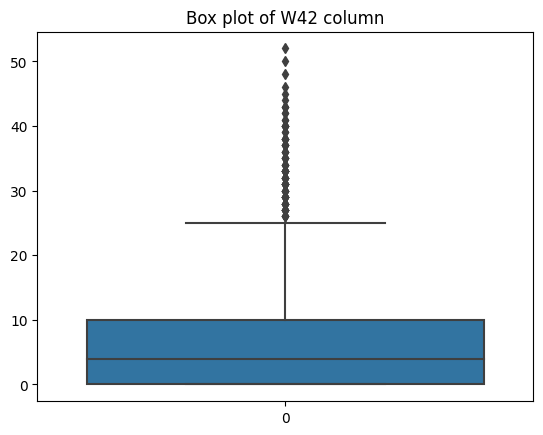

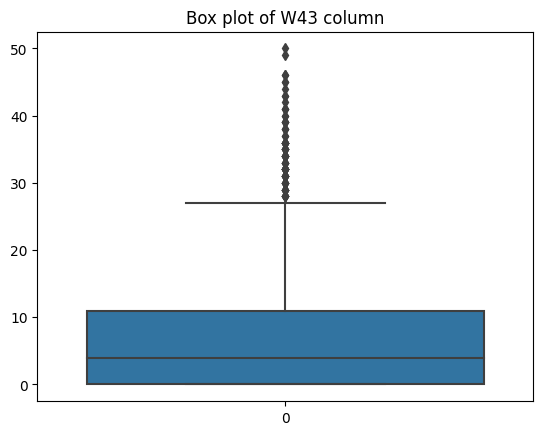

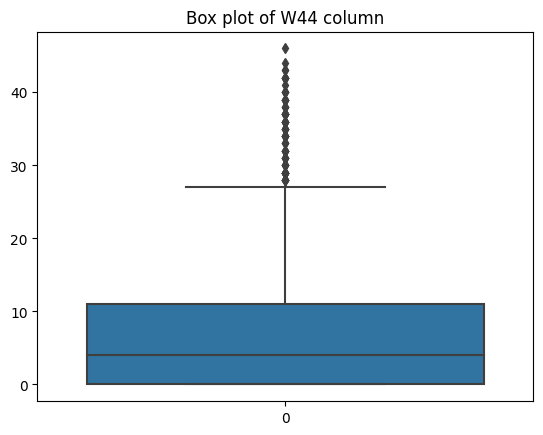

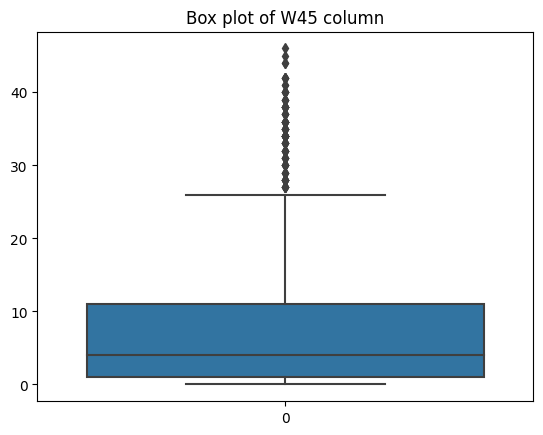

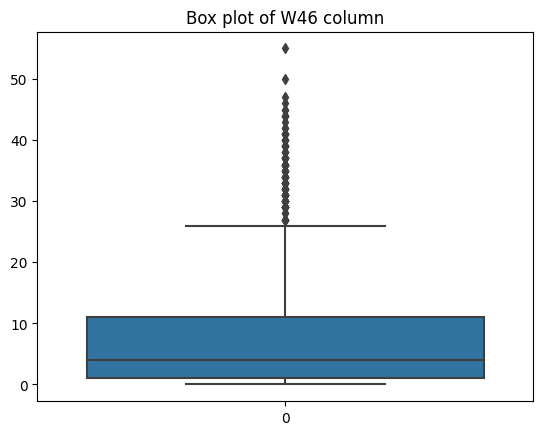

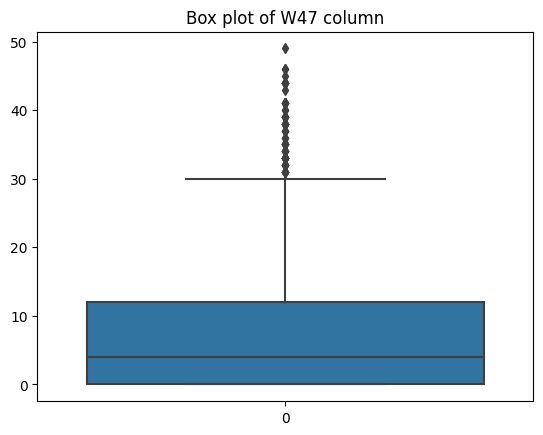

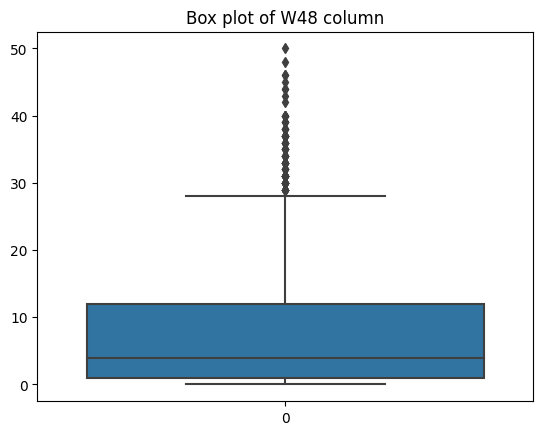

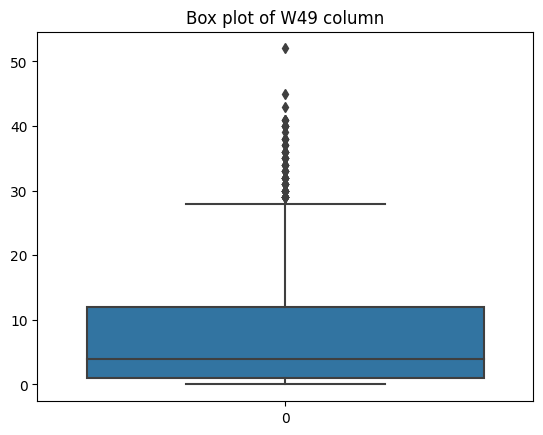

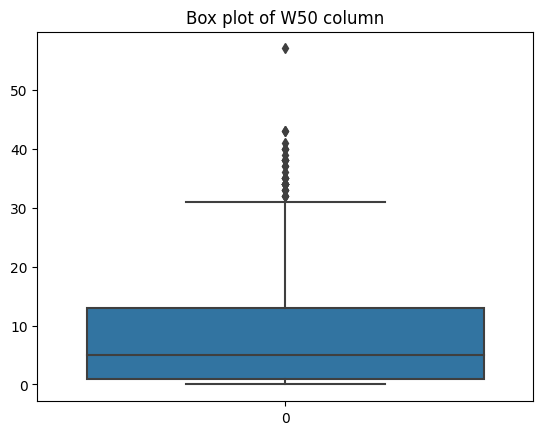

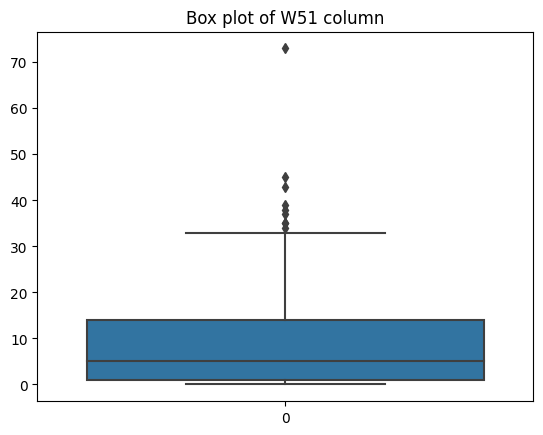

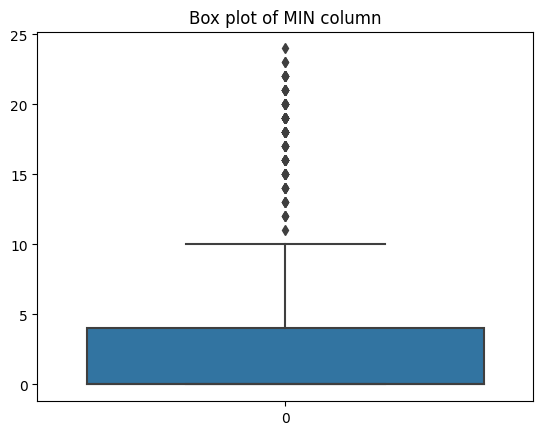

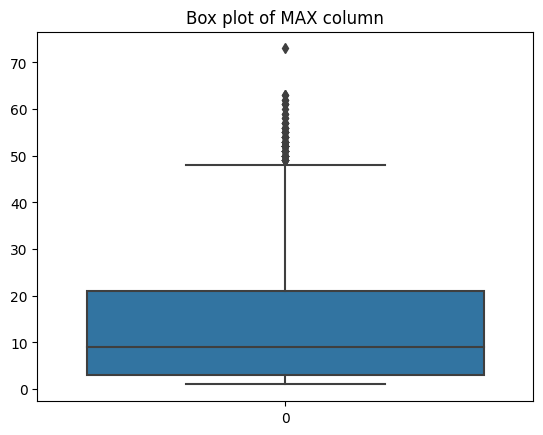

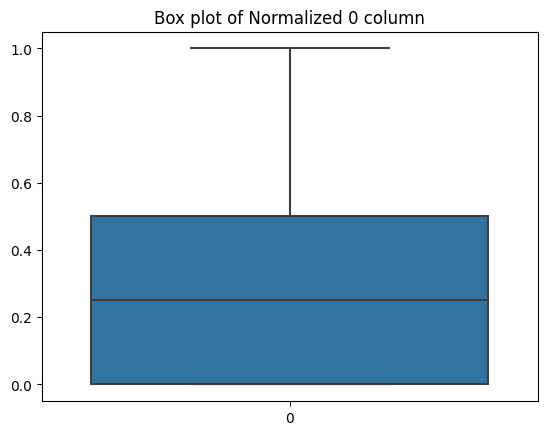

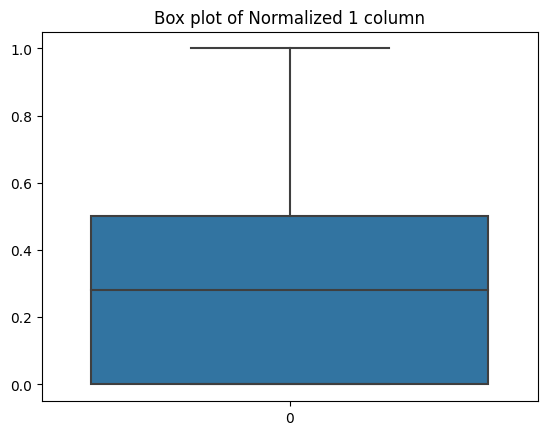

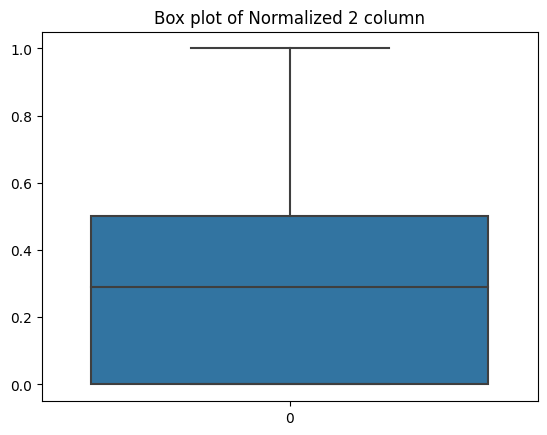

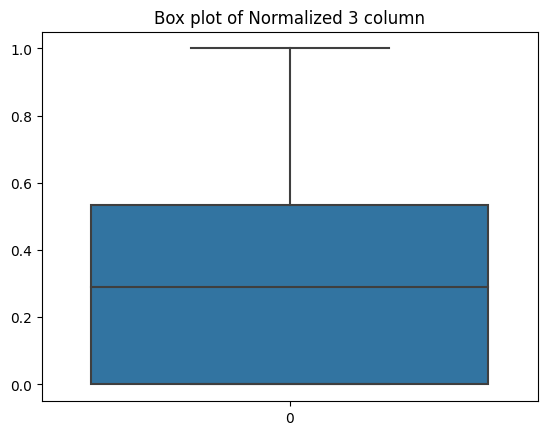

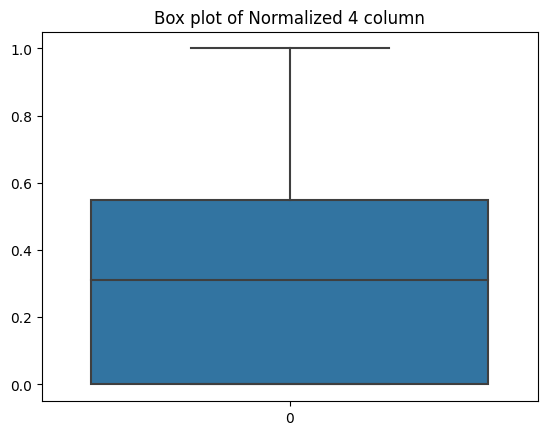

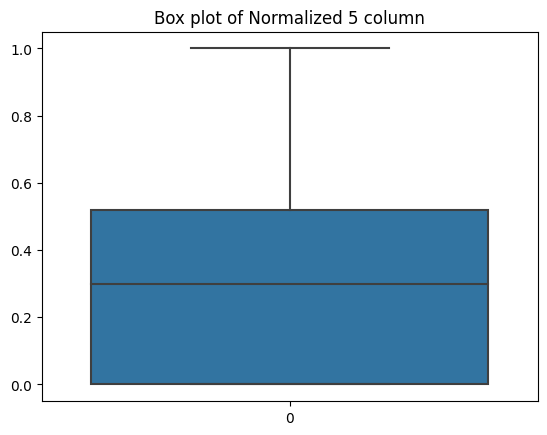

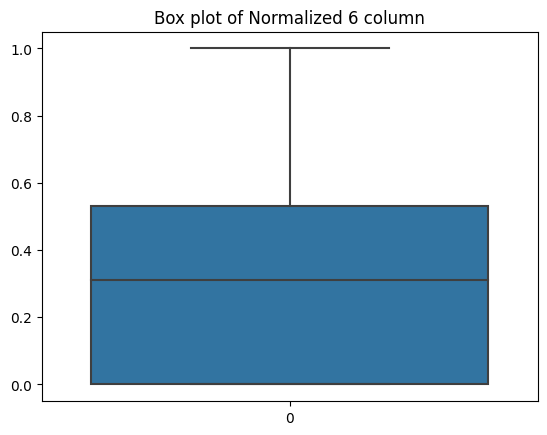

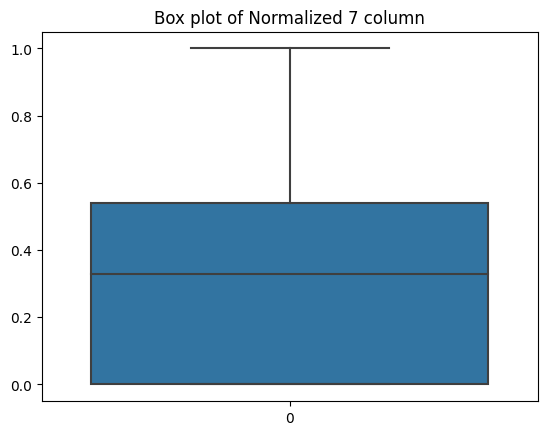

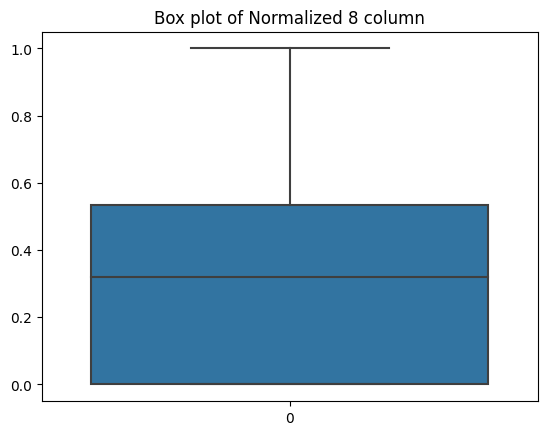

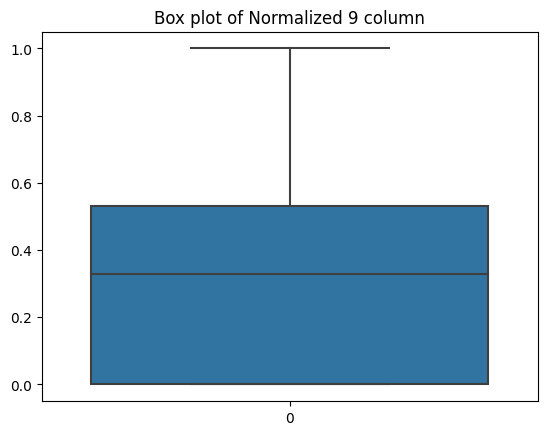

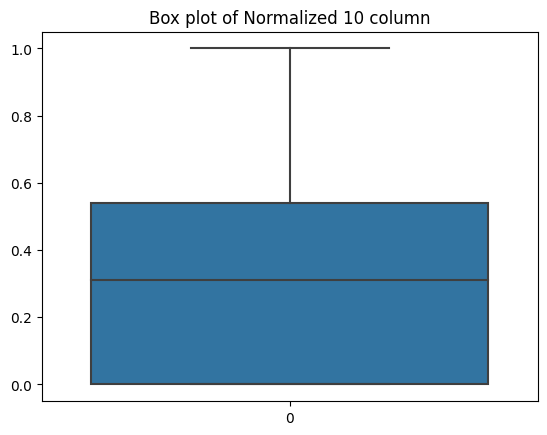

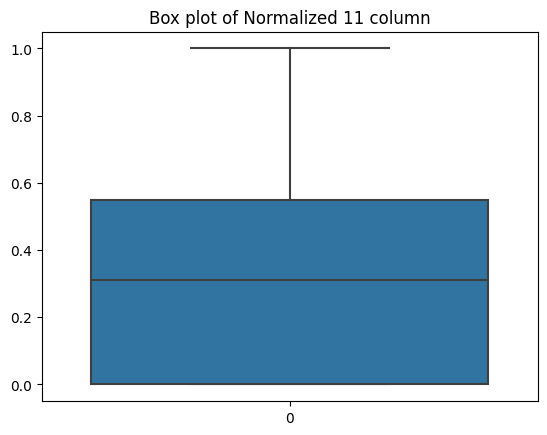

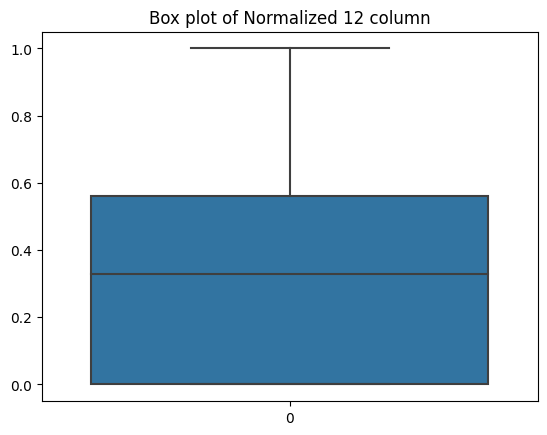

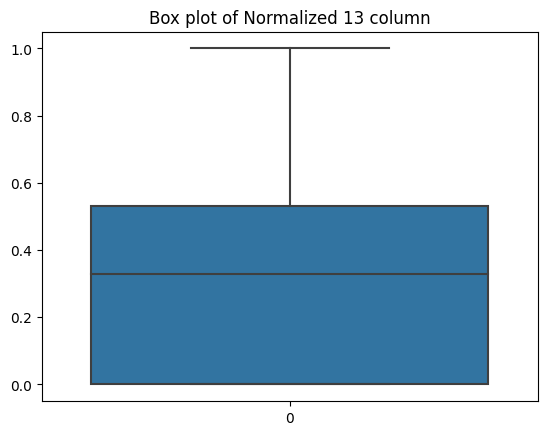

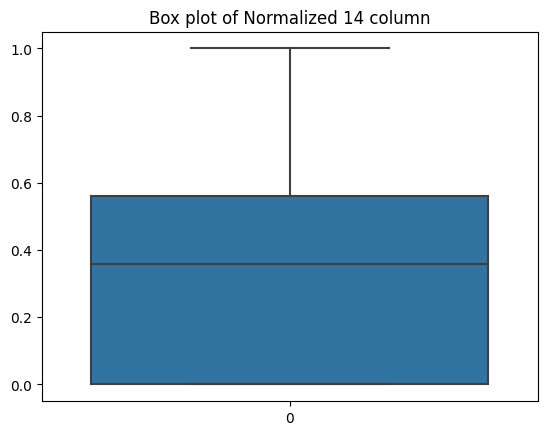

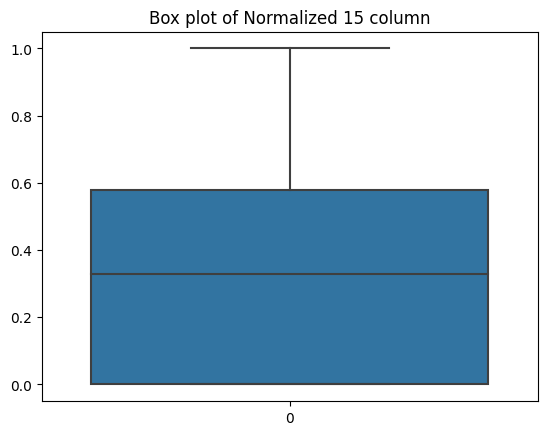

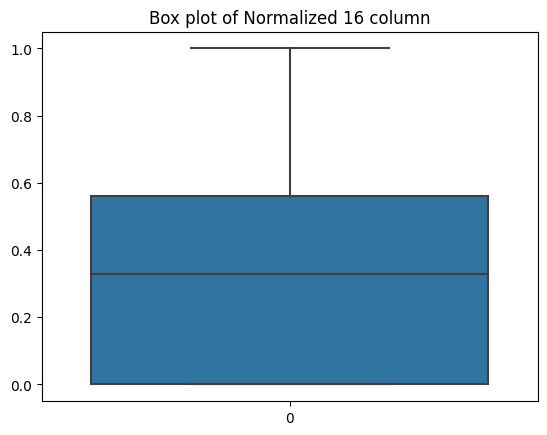

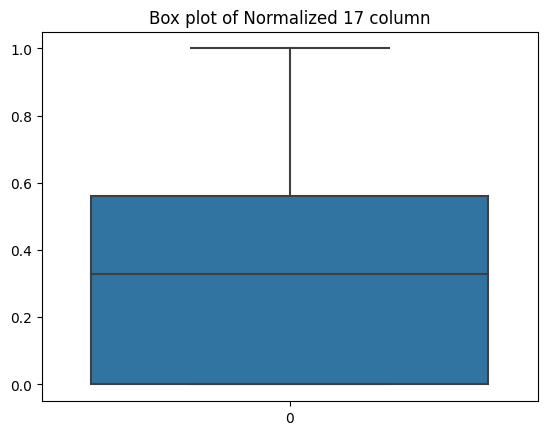

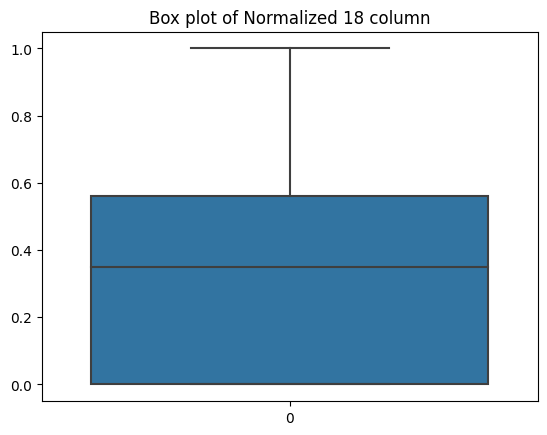

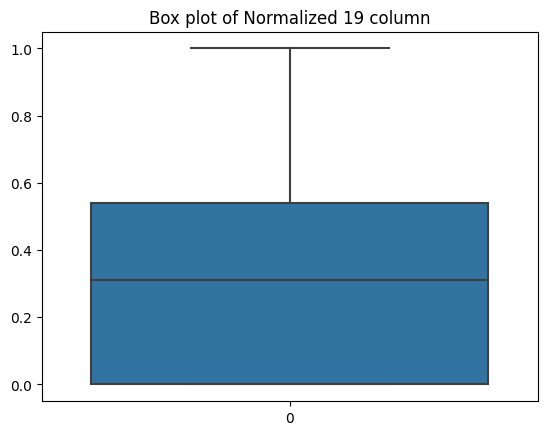

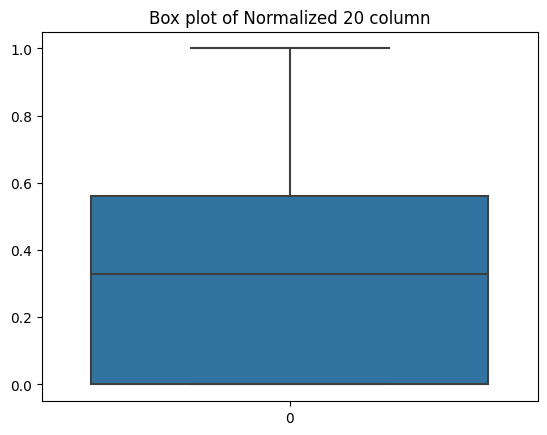

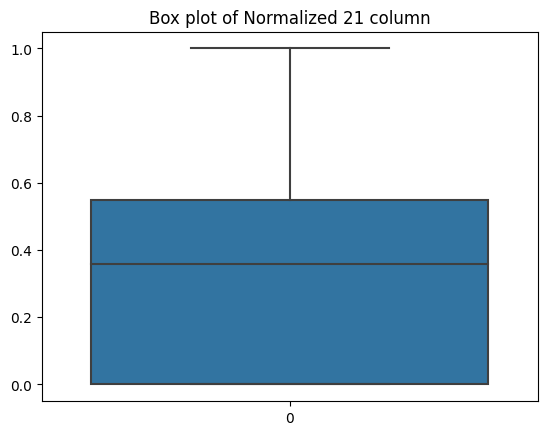

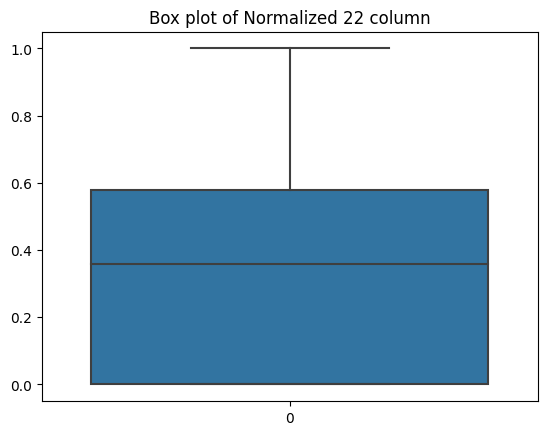

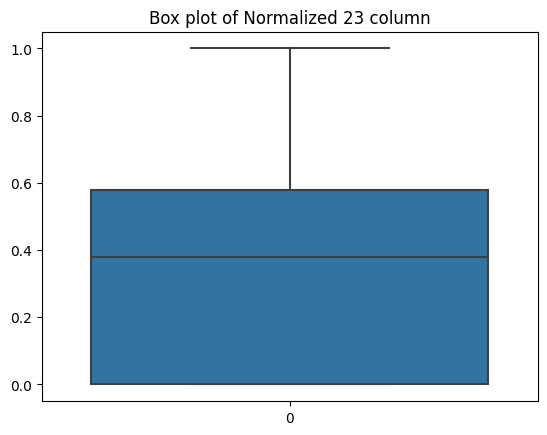

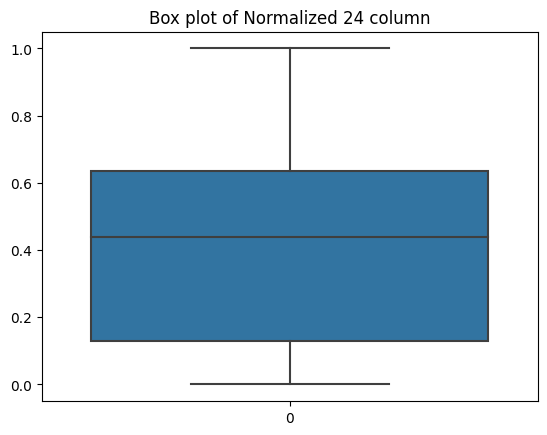

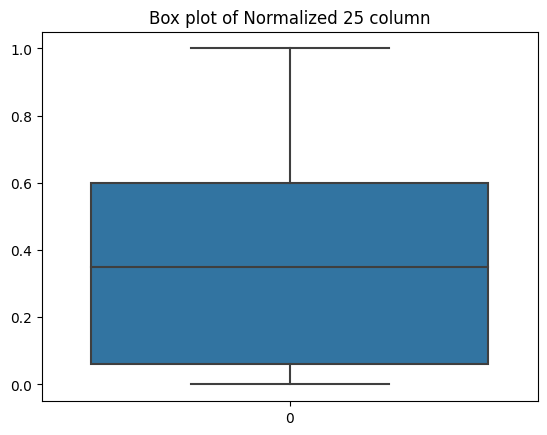

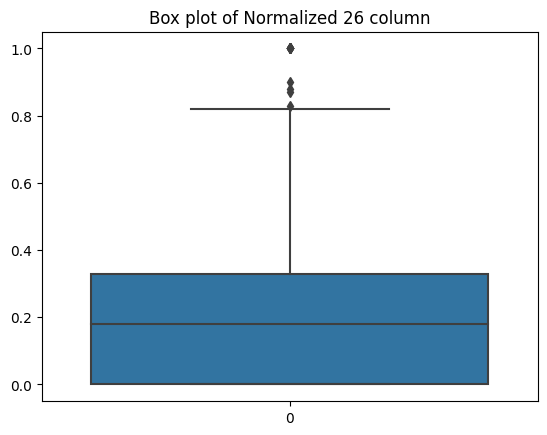

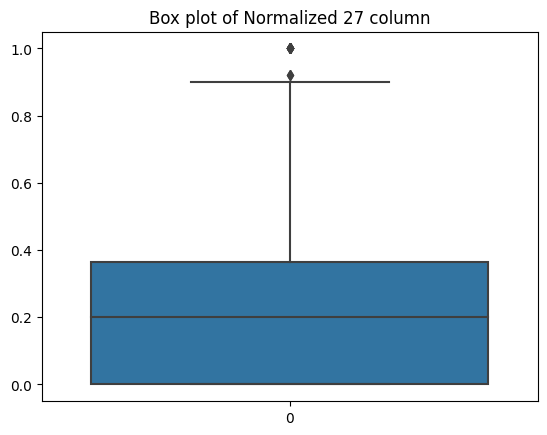

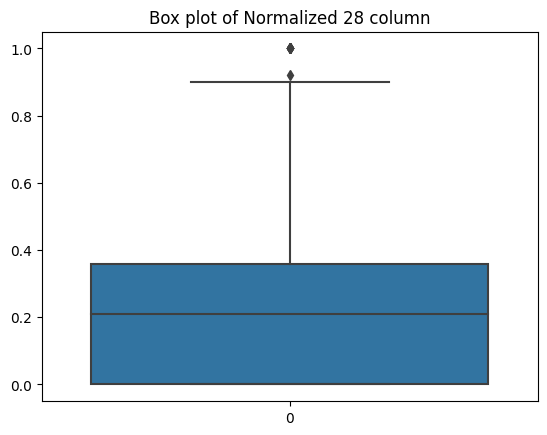

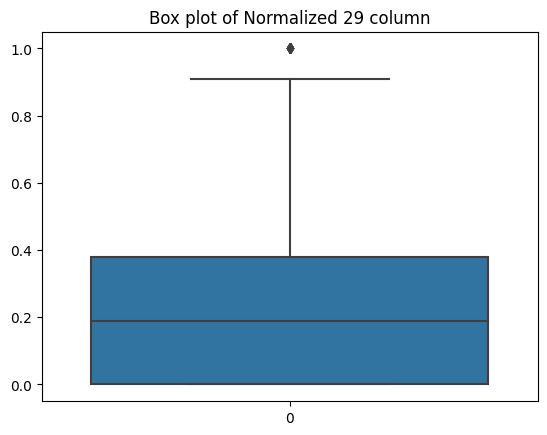

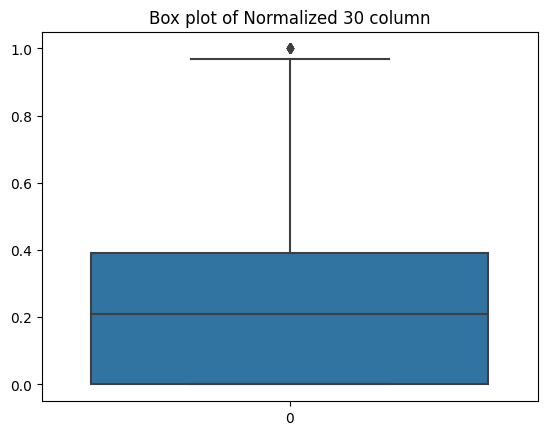

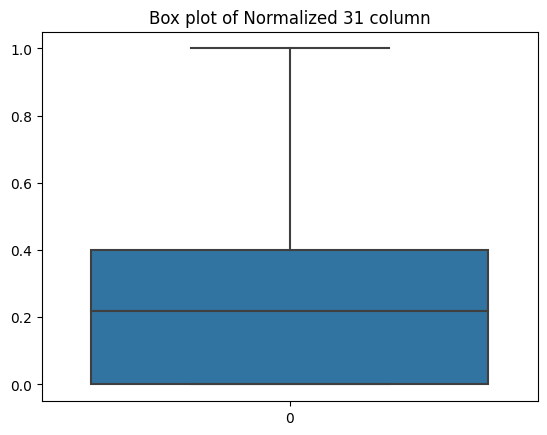

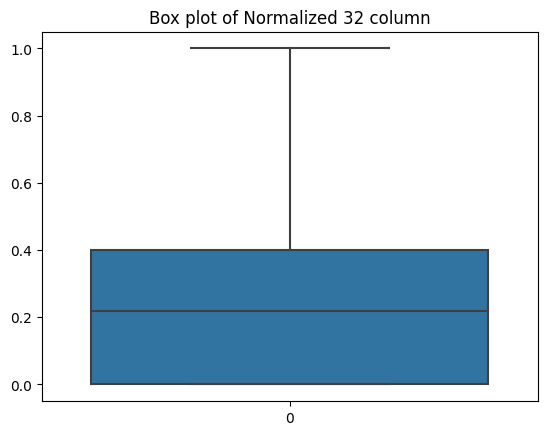

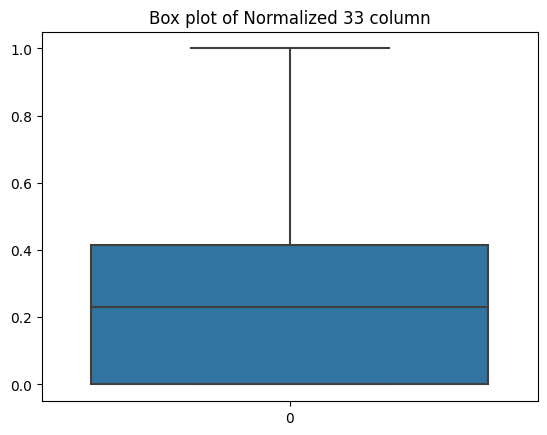

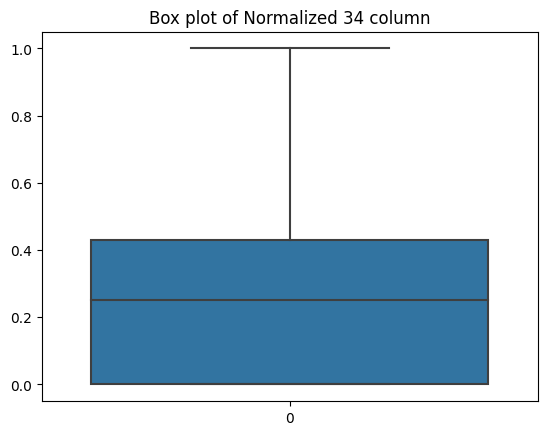

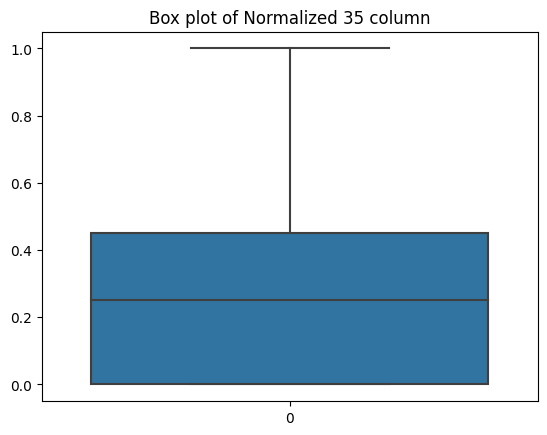

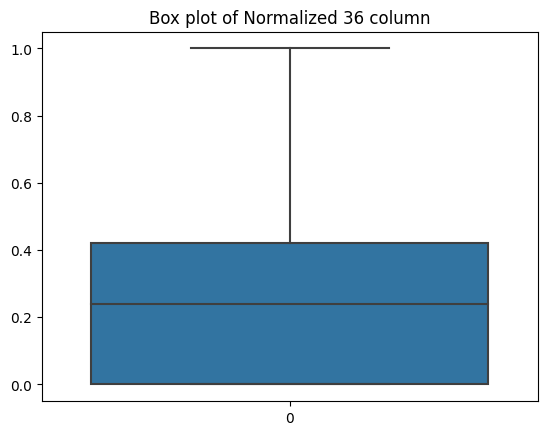

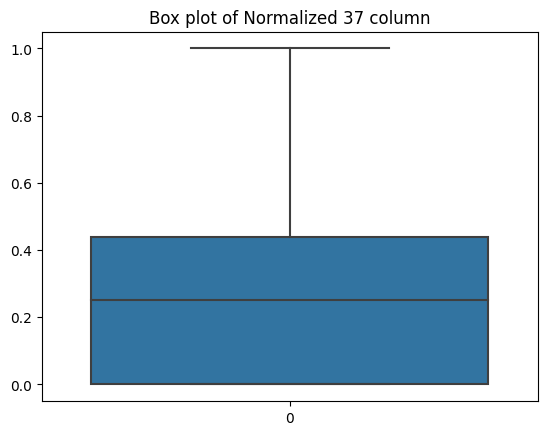

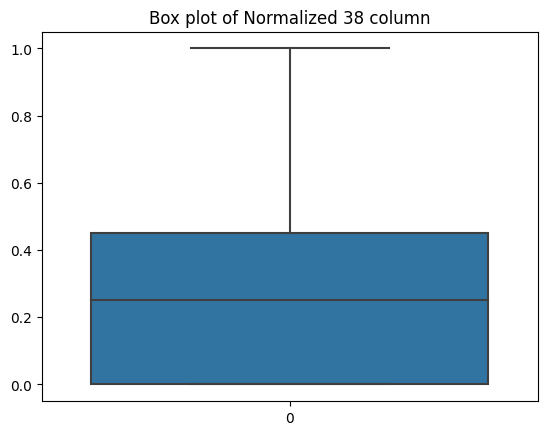

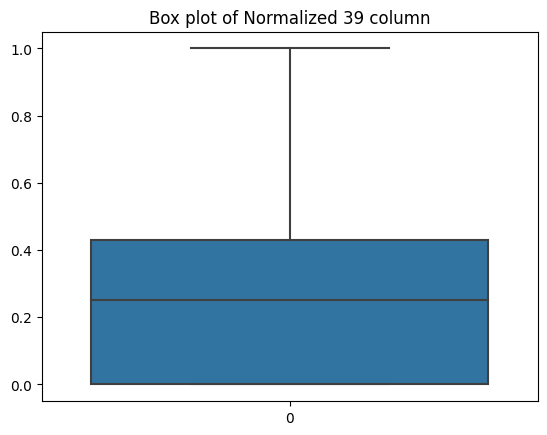

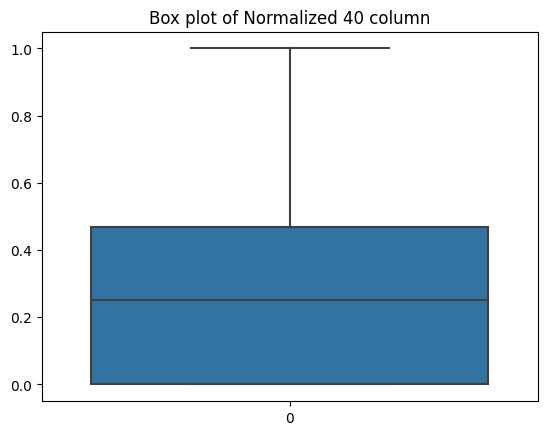

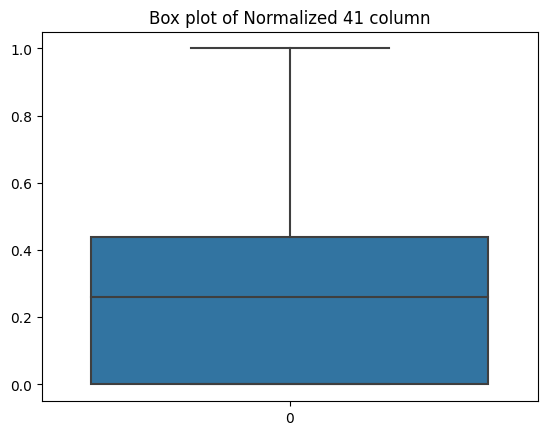

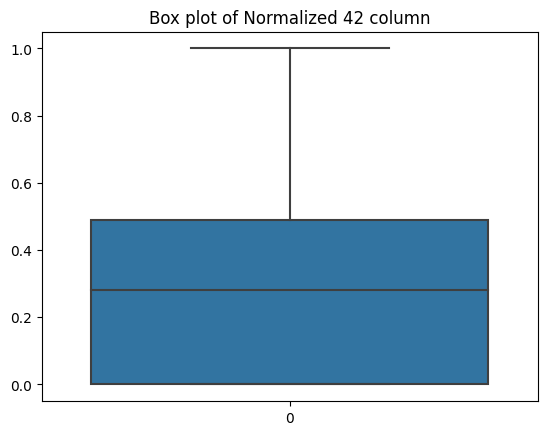

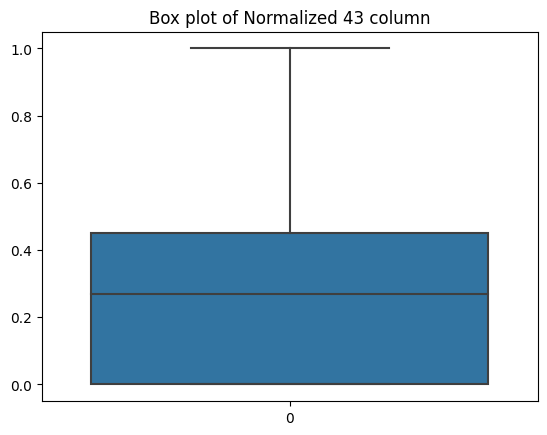

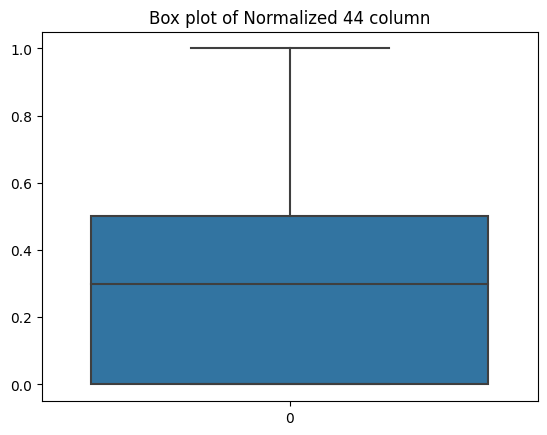

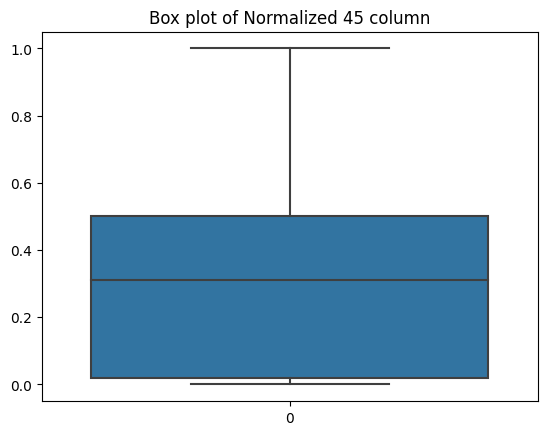

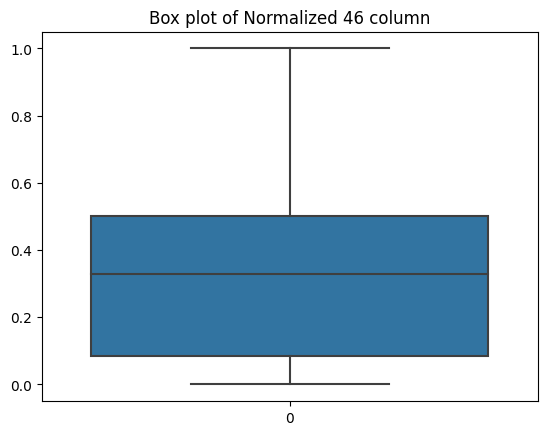

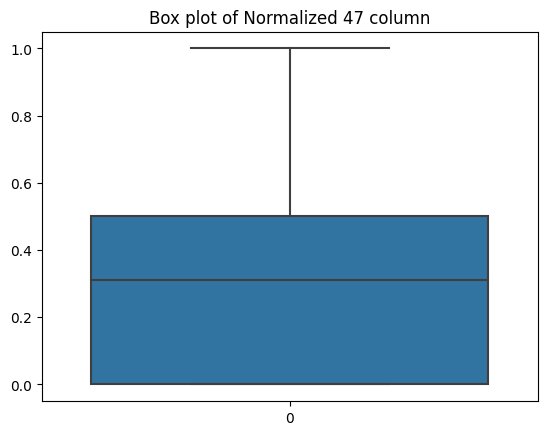

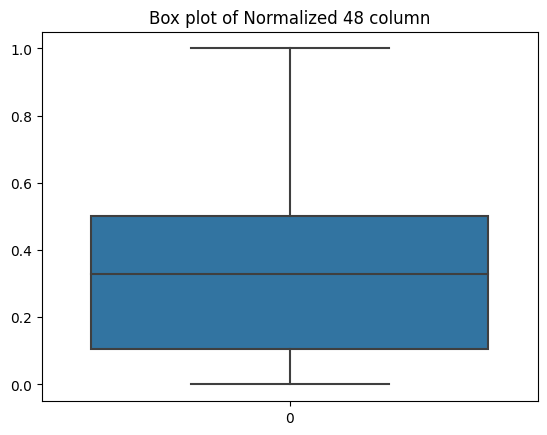

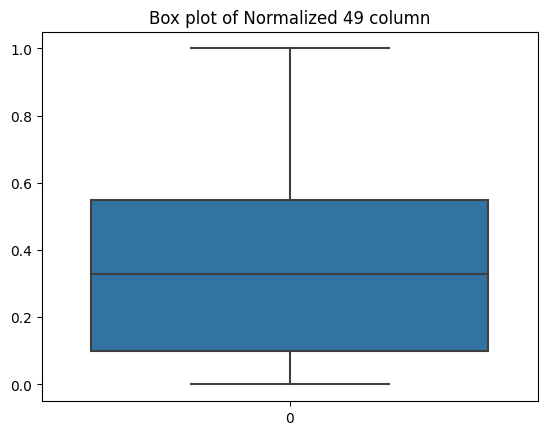

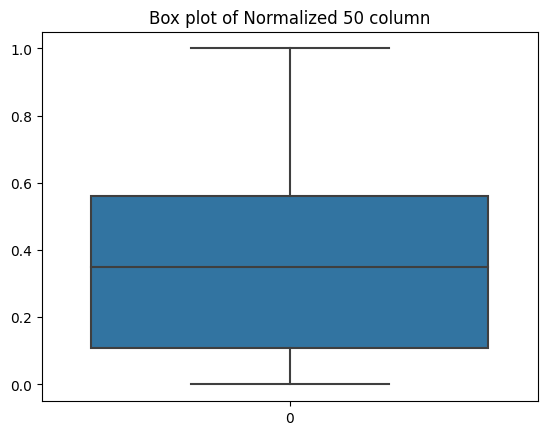

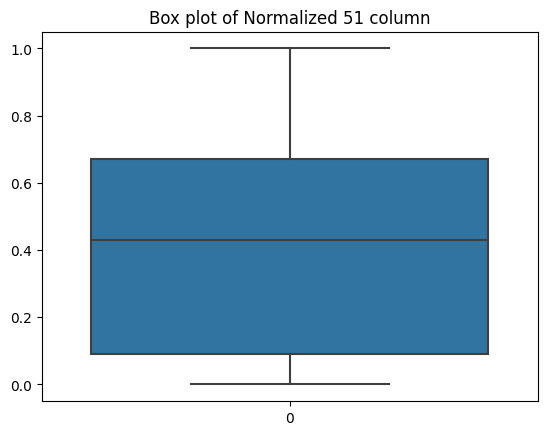

In [32]:
for i in file.select_dtypes(['int','float']).columns:
      plt.title("Box plot of "+str(i)+' column')
      sbs.boxplot(file[i])
      plt.show()

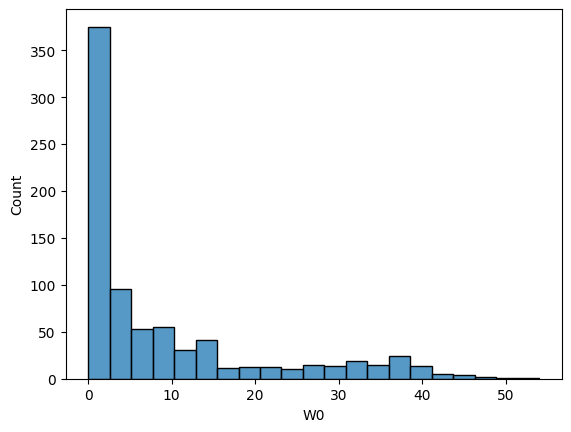

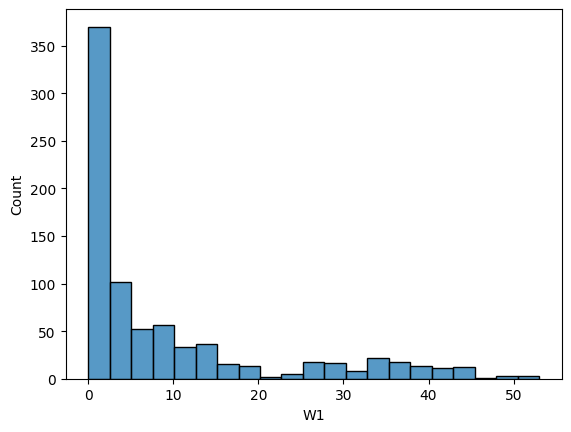

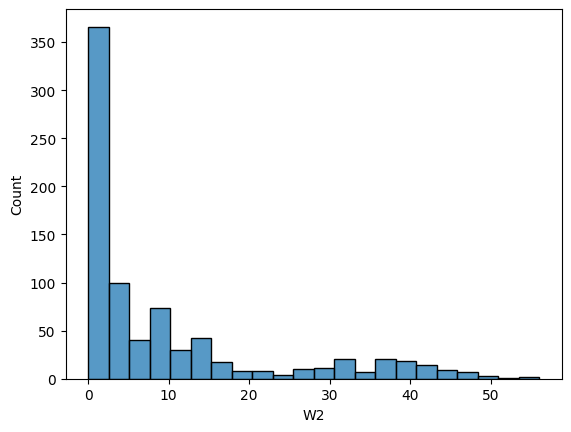

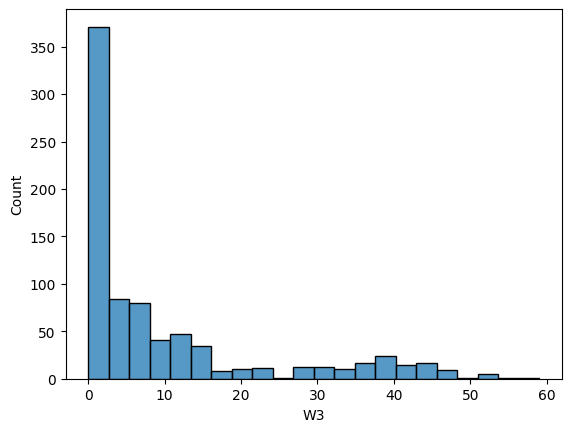

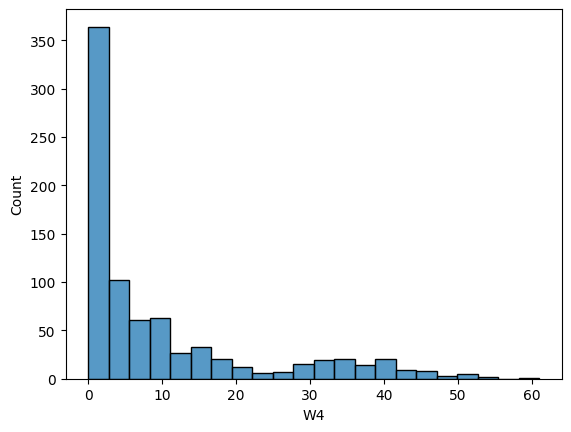

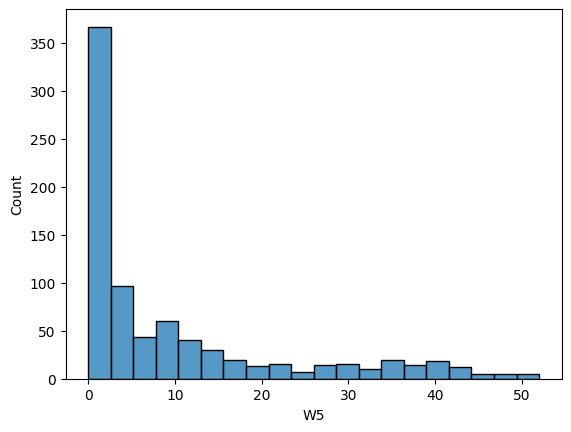

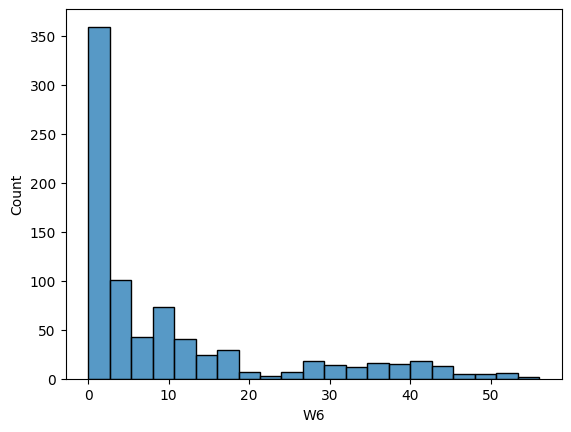

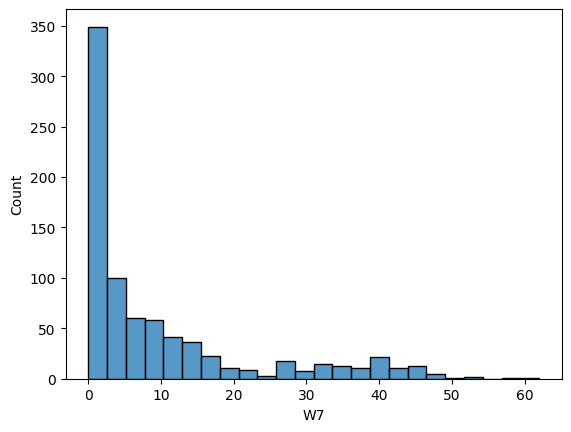

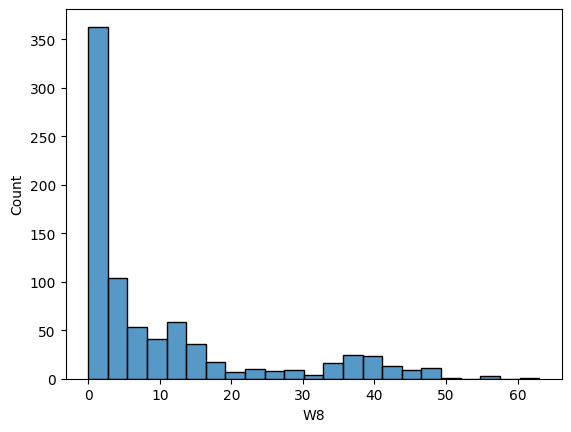

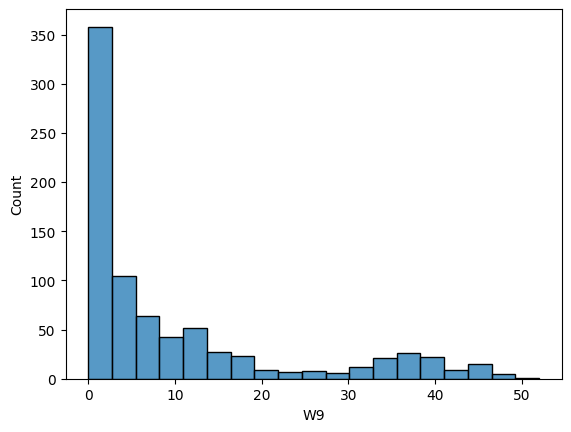

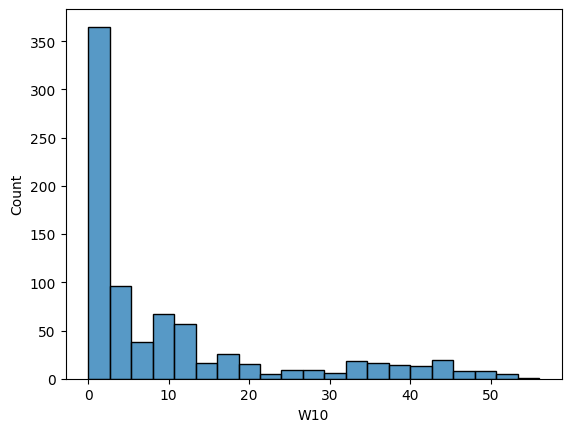

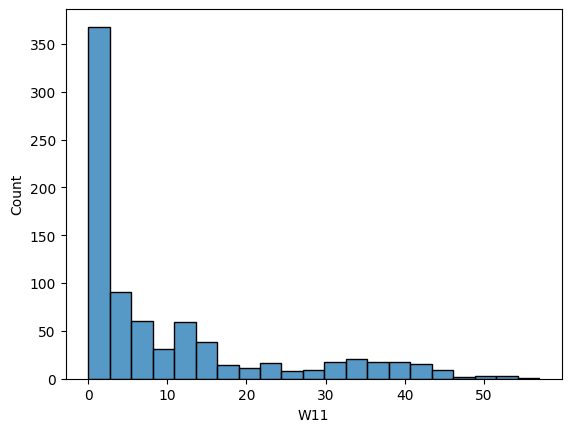

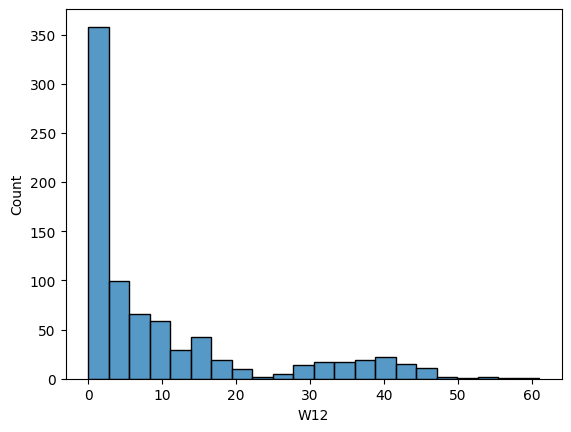

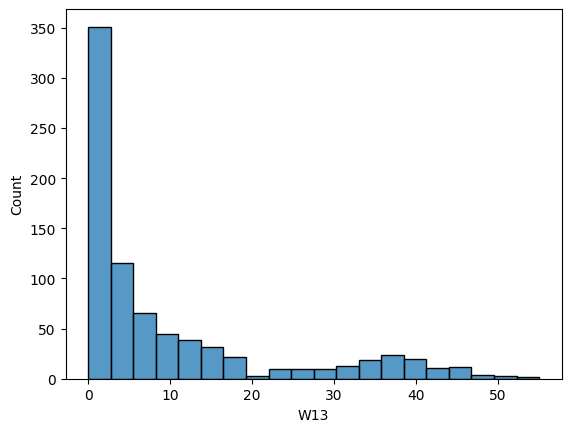

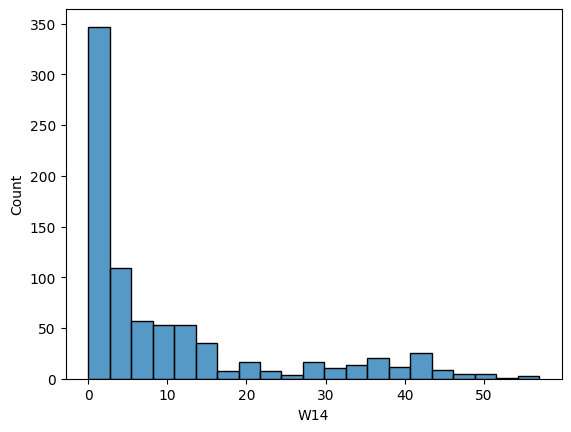

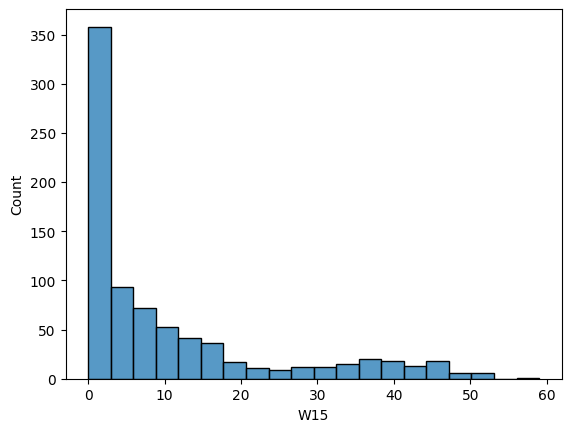

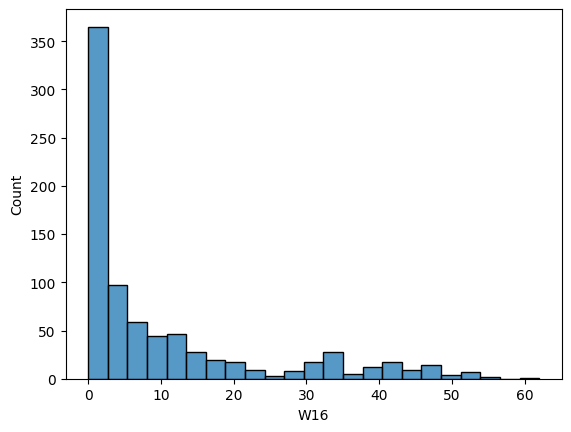

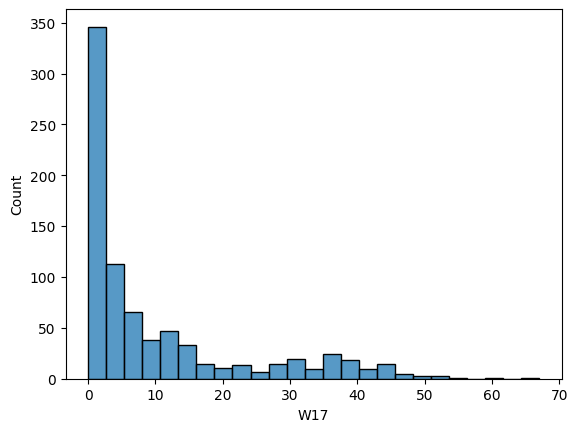

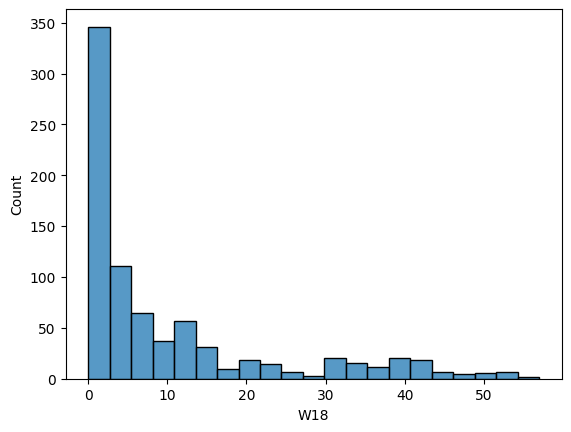

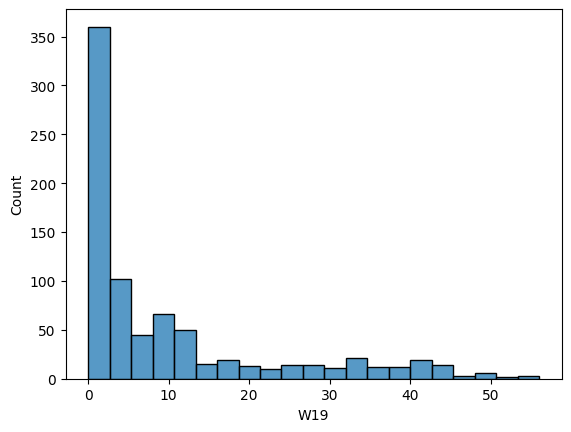

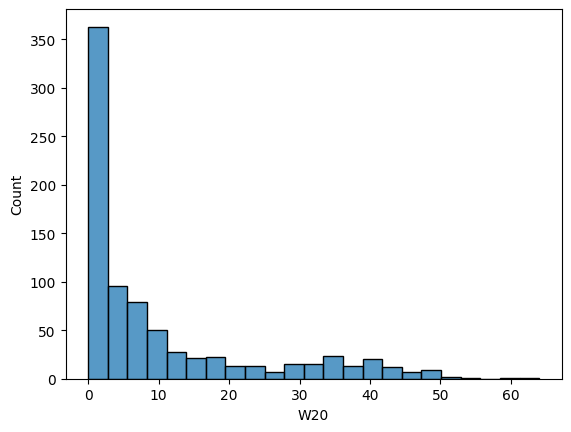

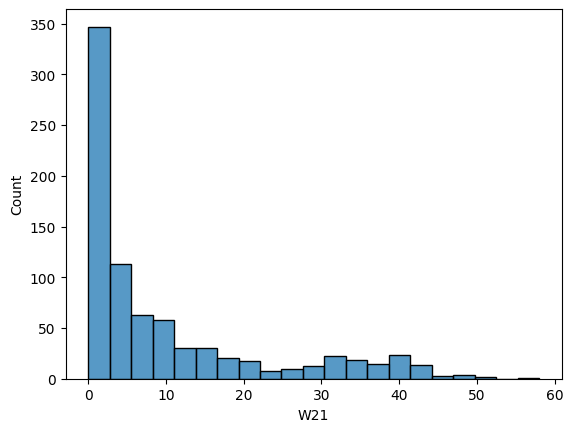

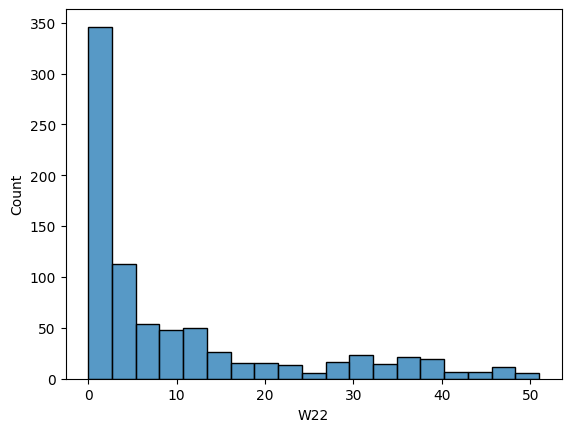

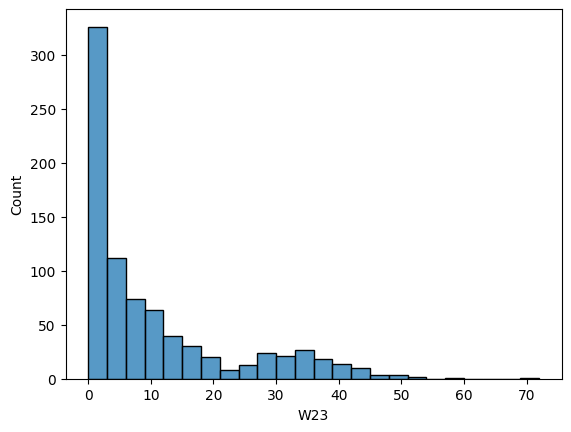

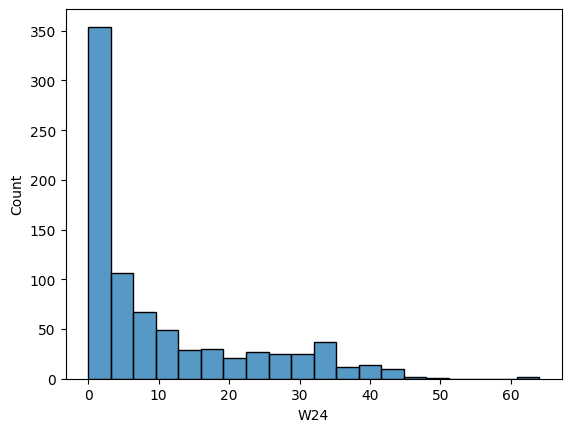

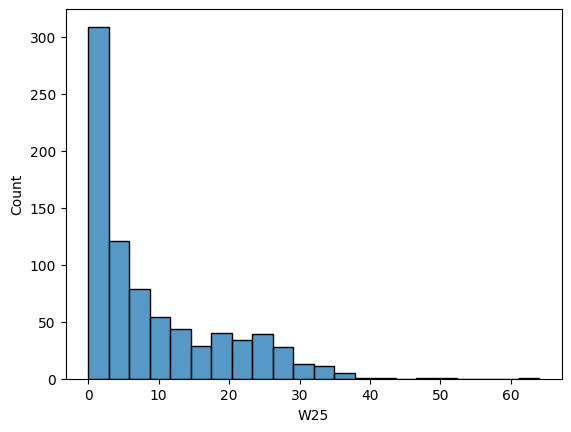

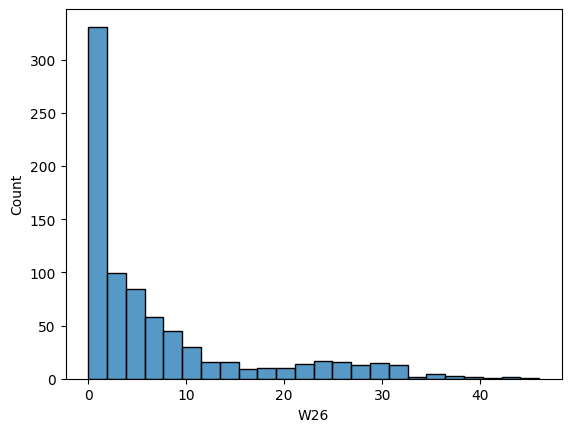

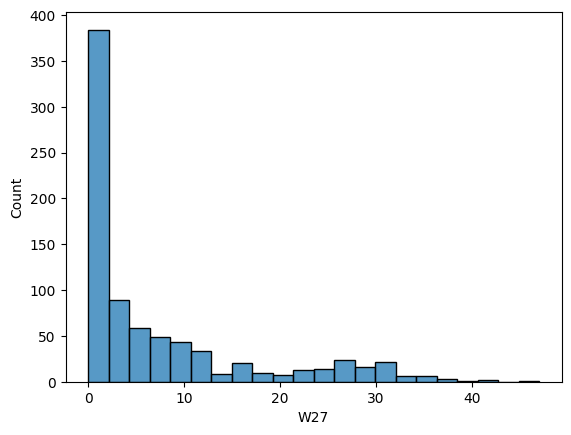

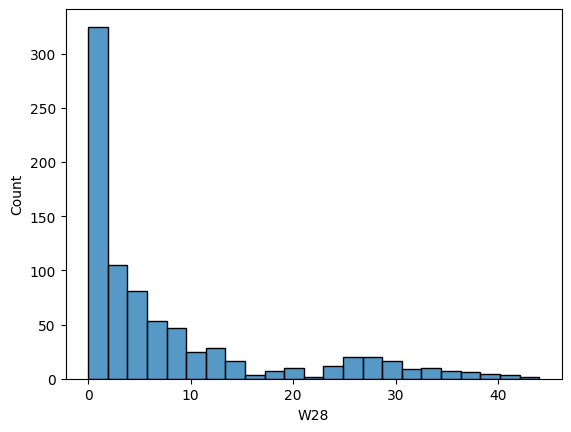

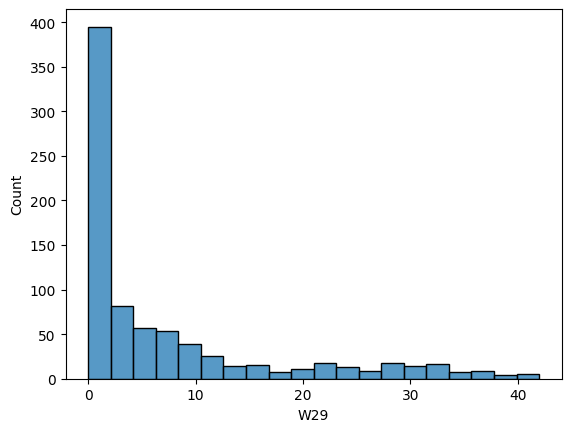

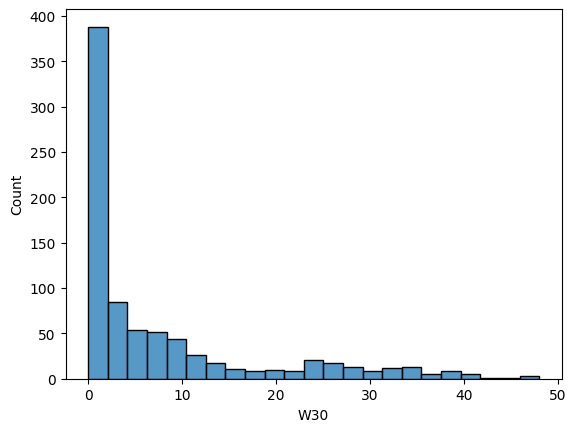

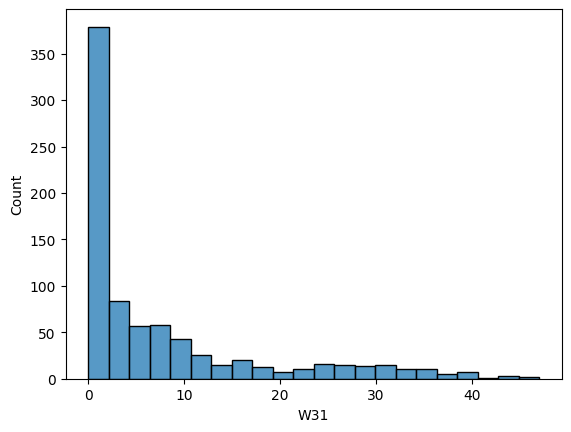

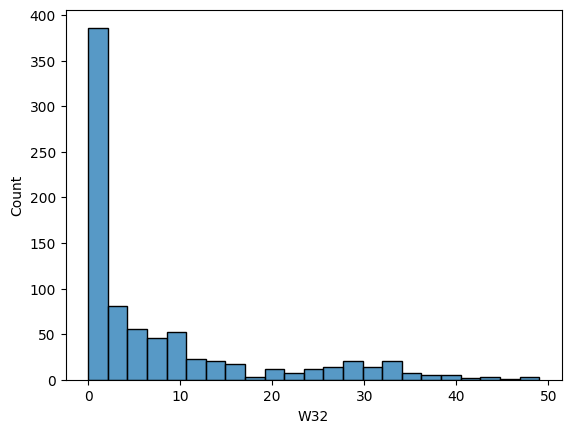

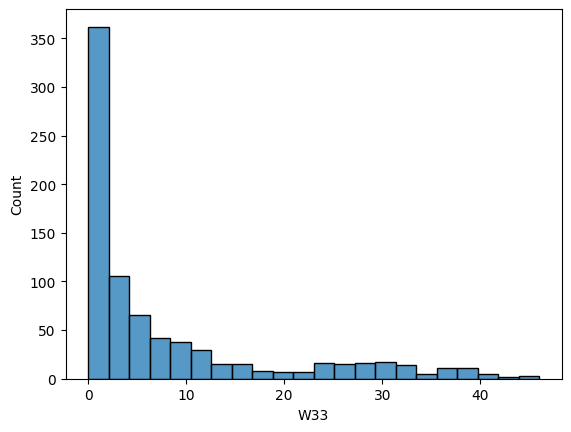

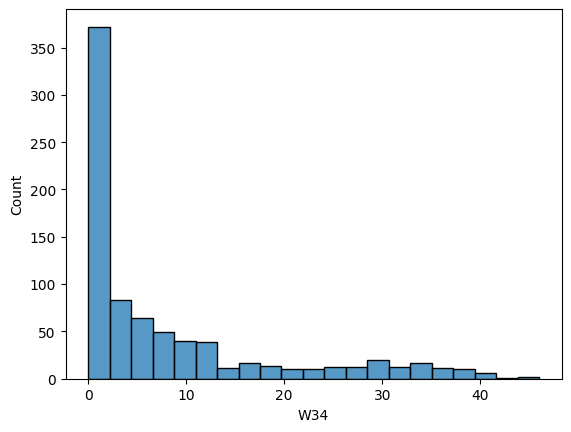

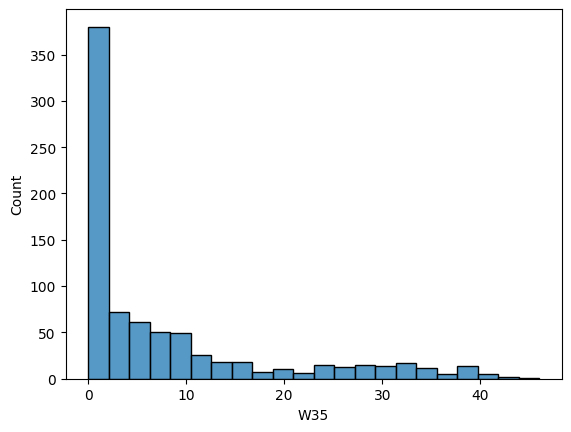

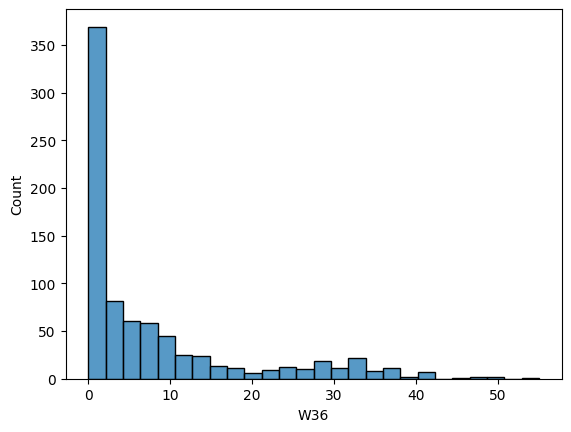

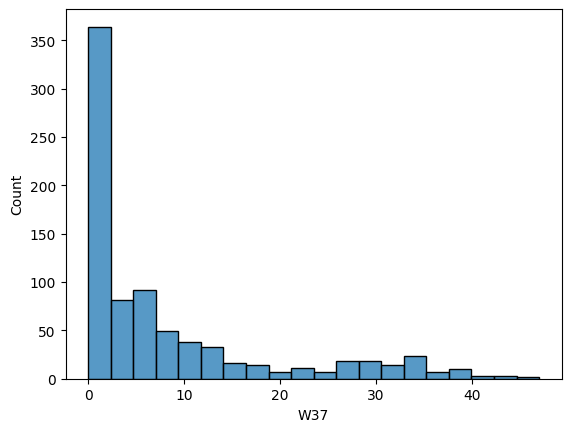

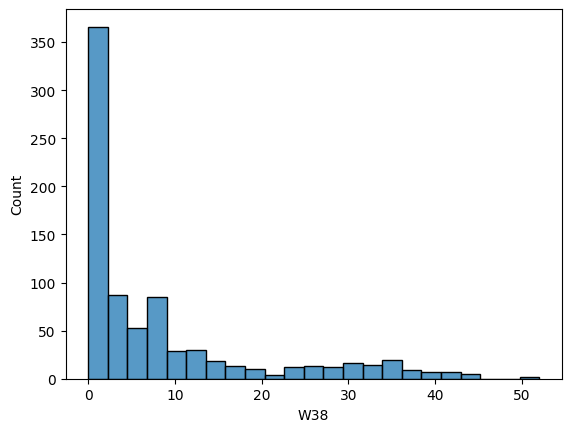

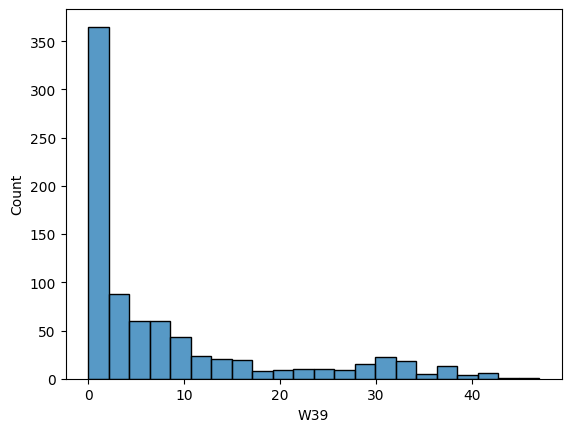

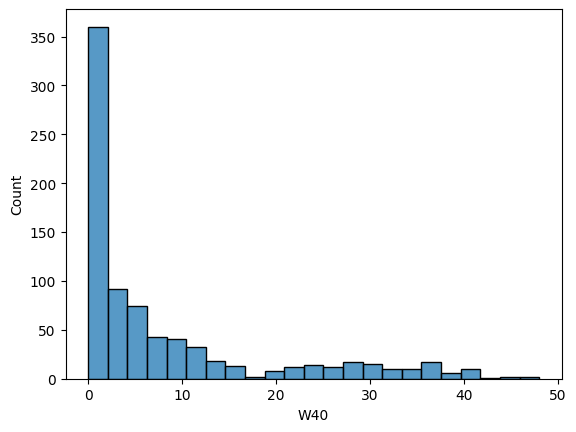

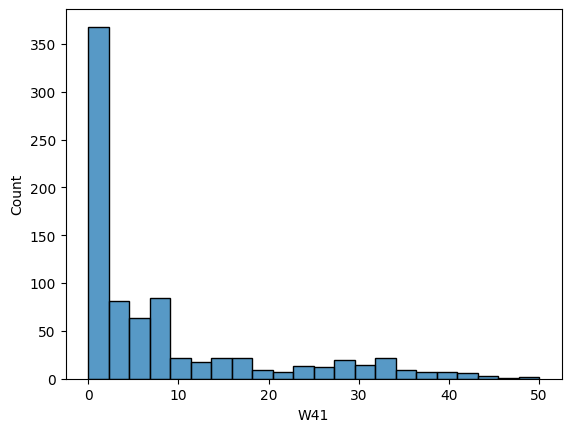

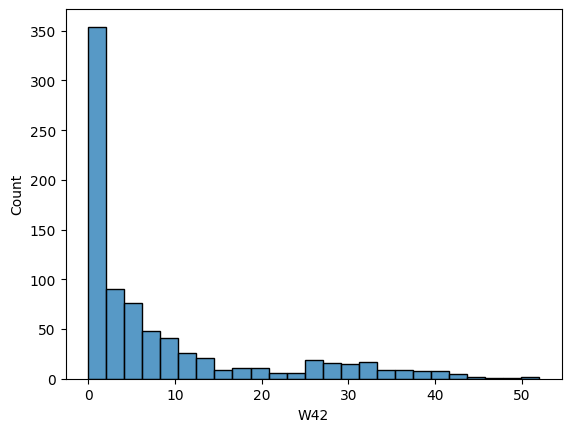

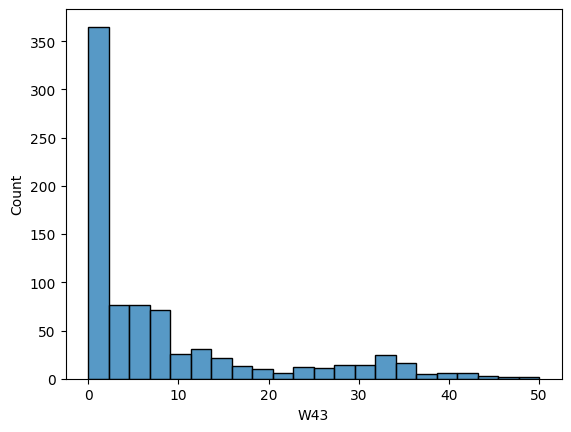

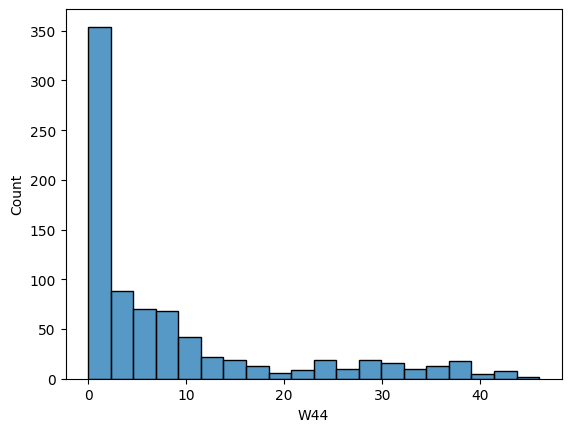

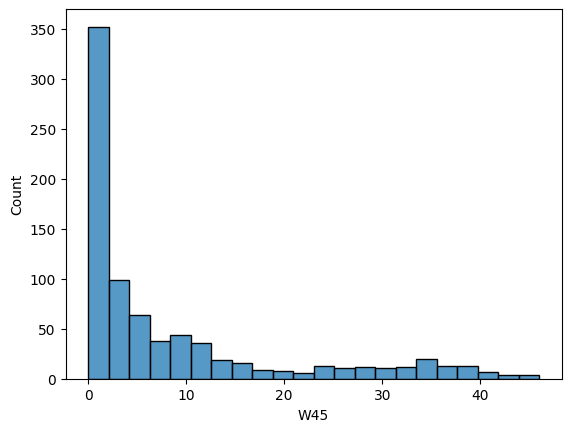

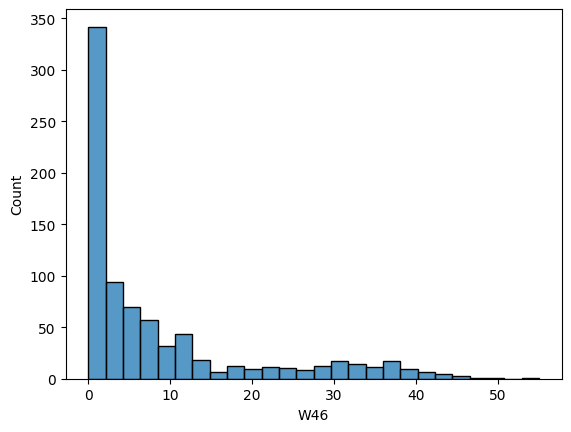

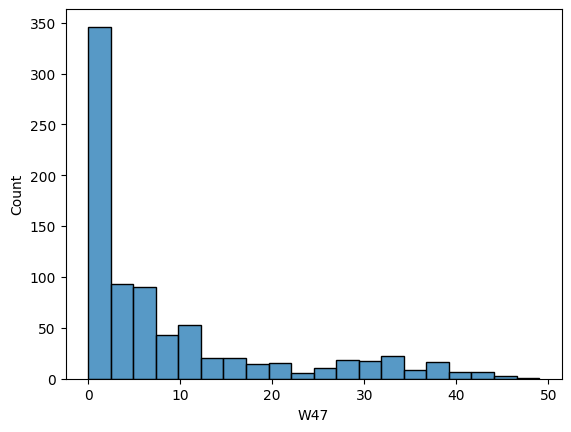

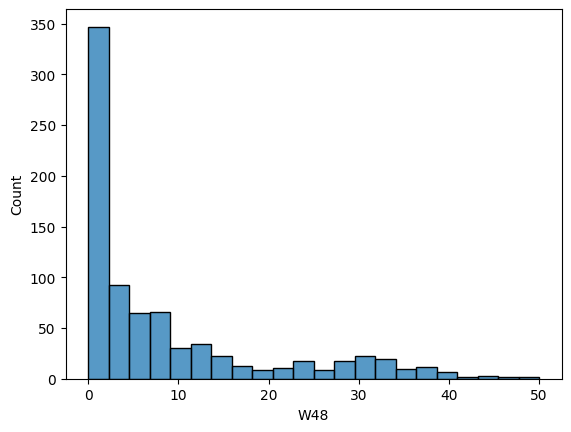

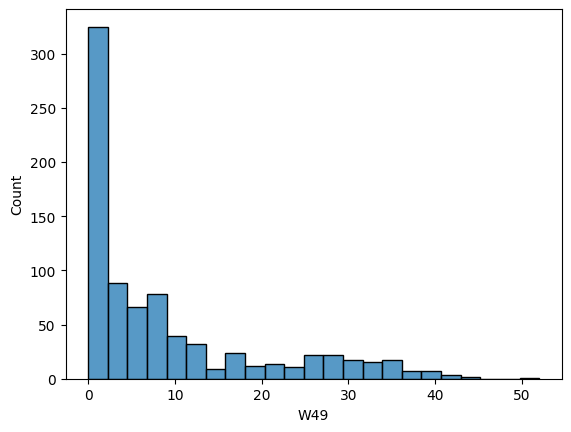

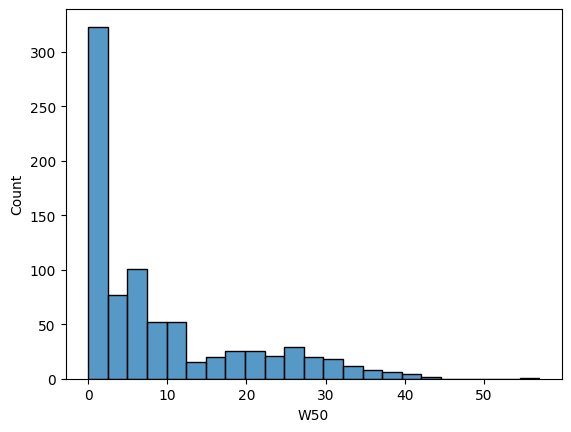

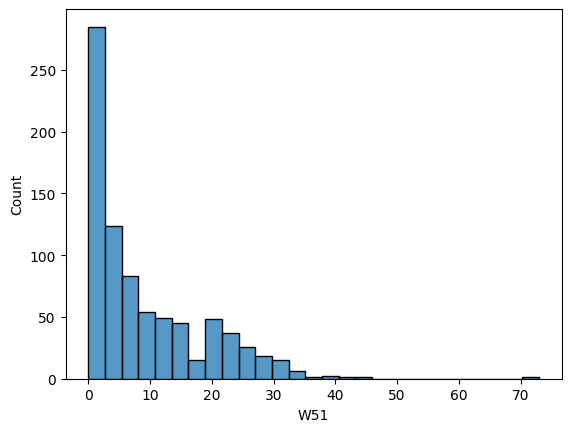

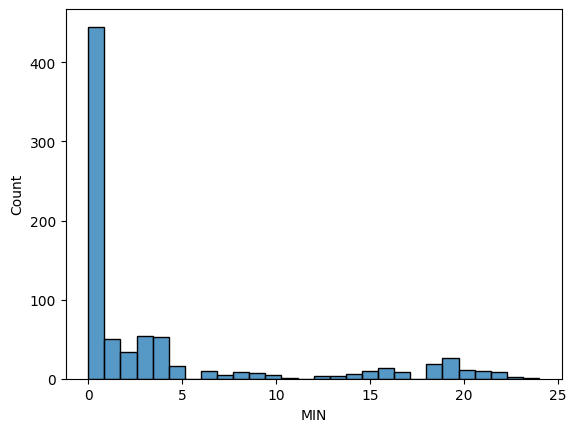

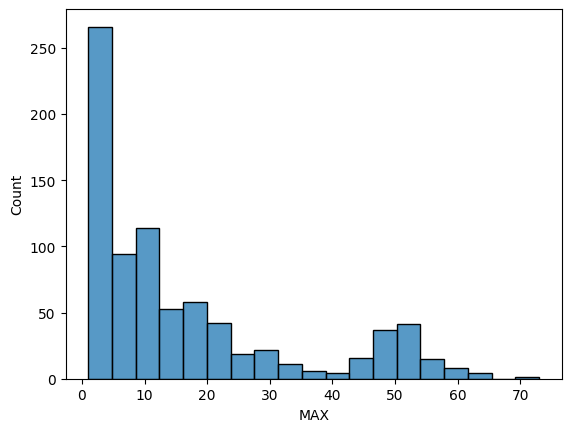

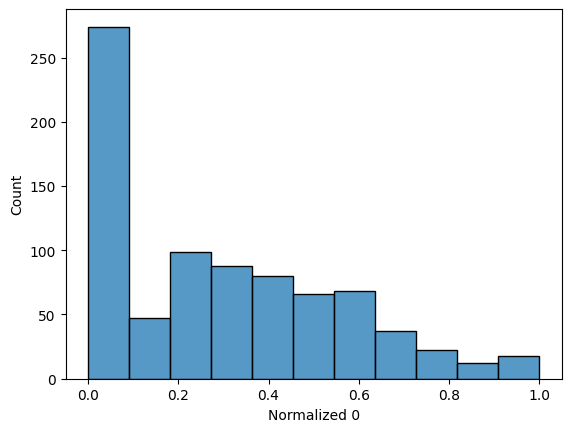

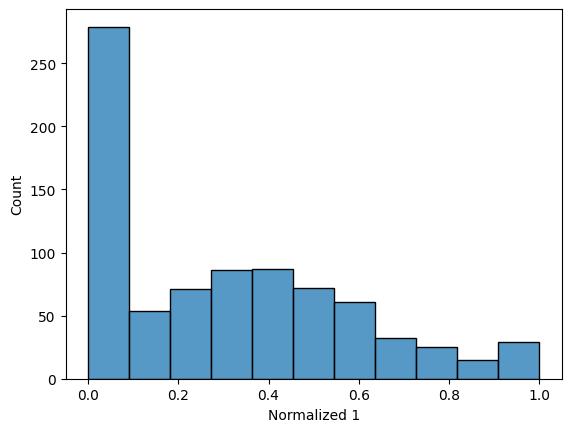

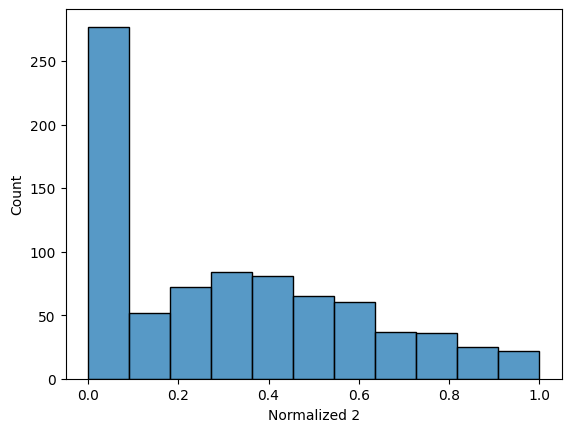

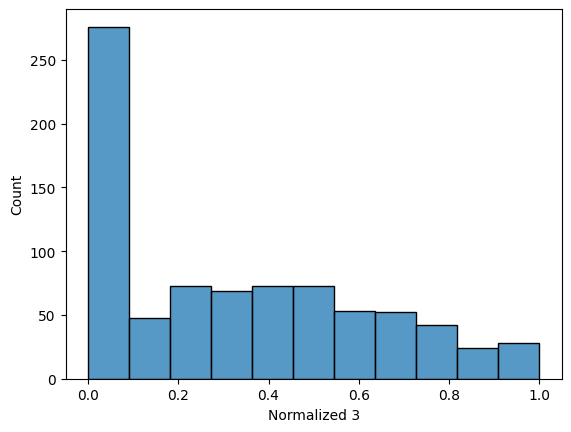

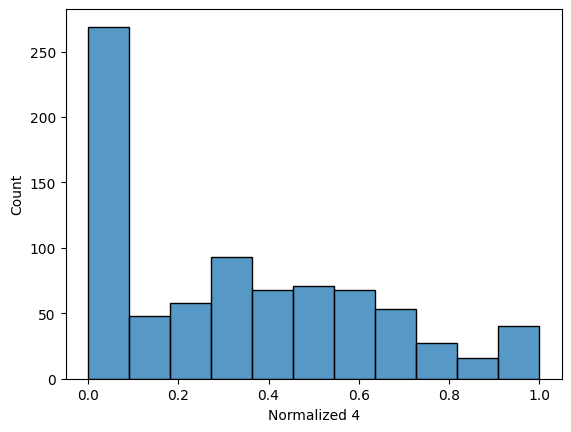

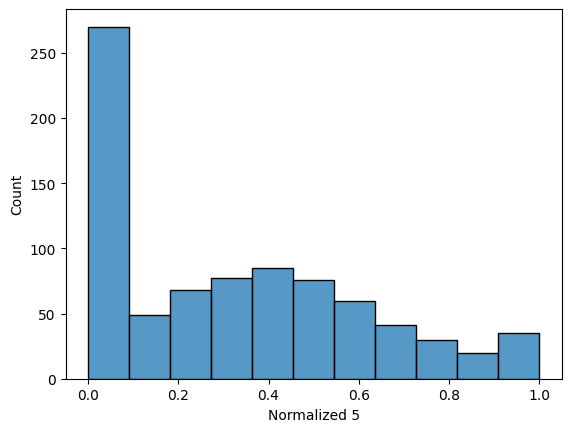

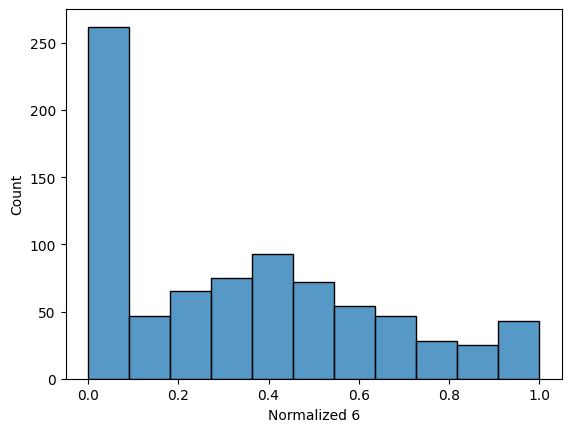

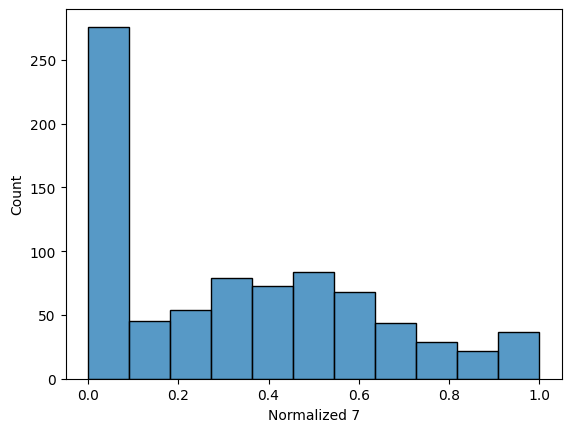

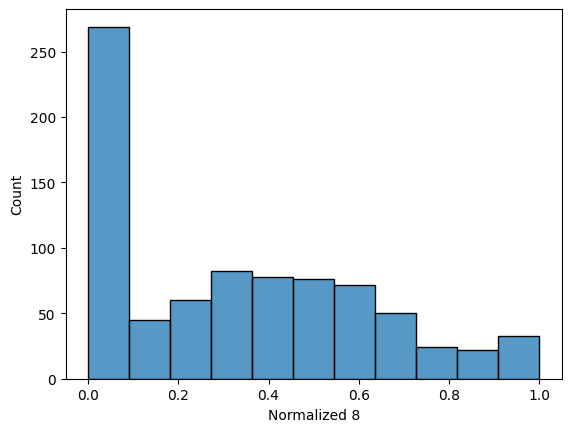

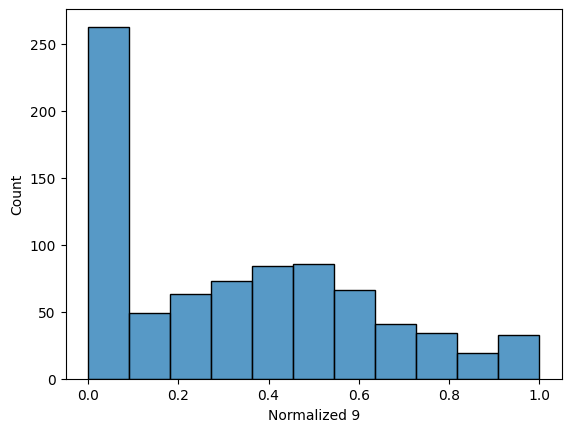

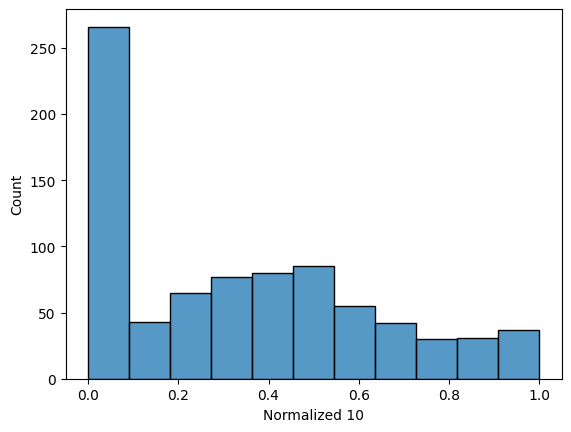

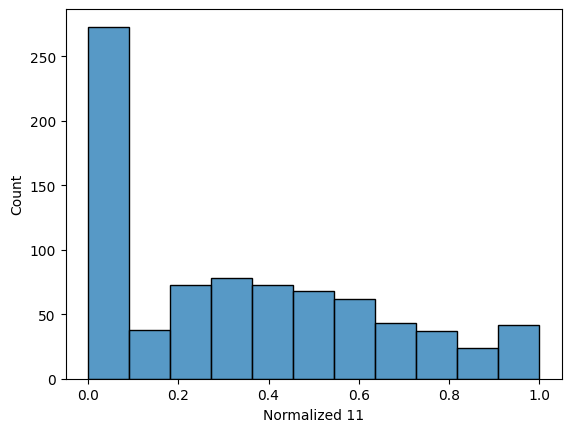

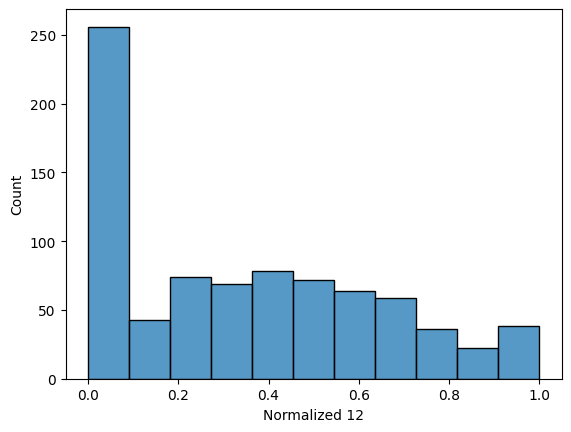

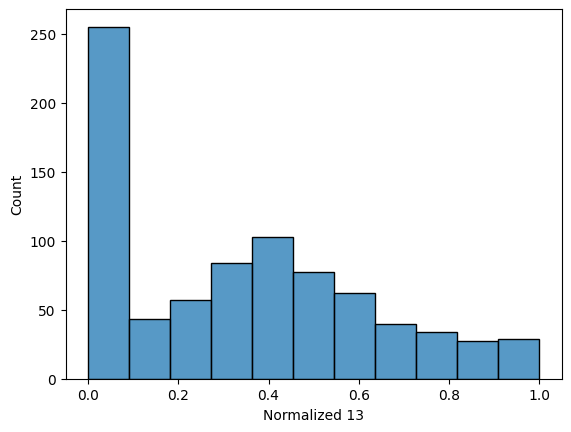

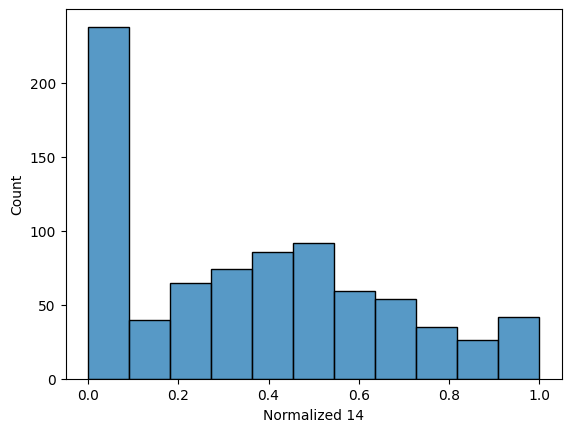

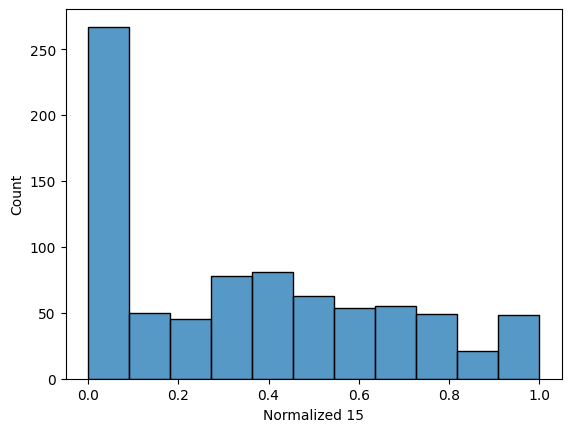

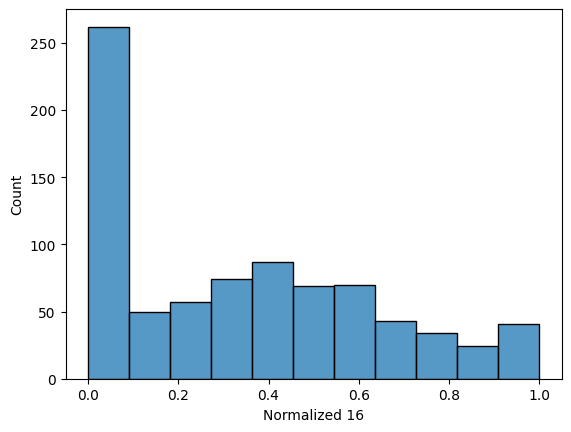

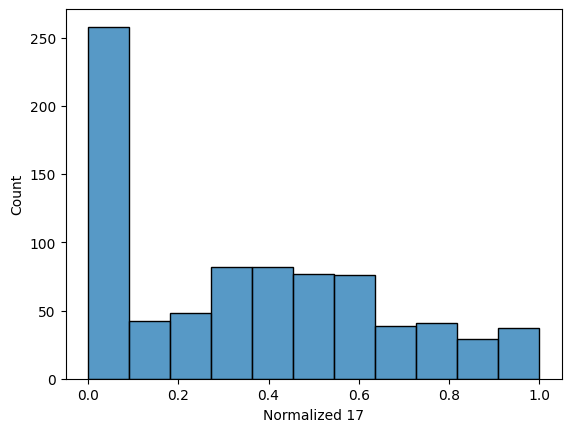

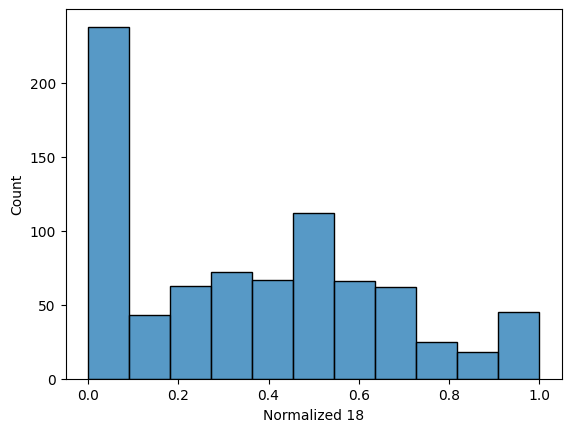

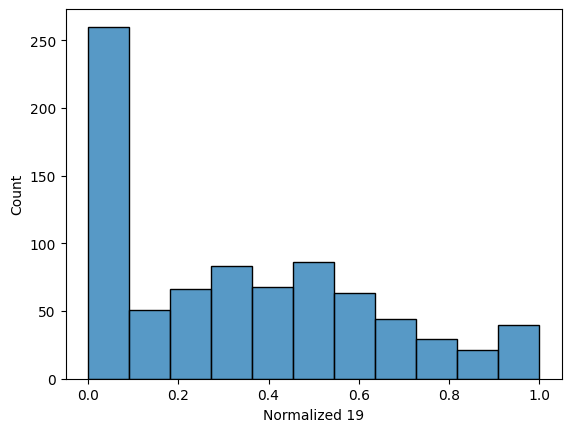

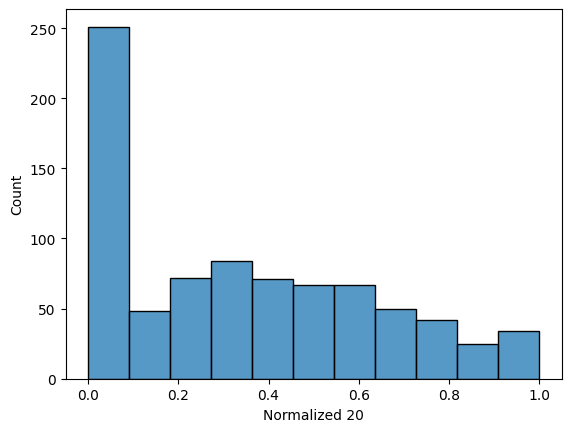

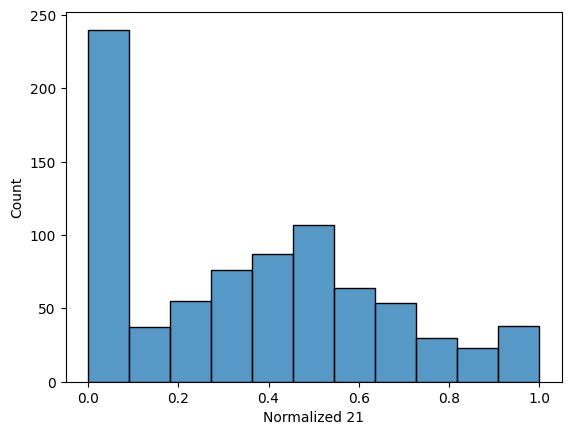

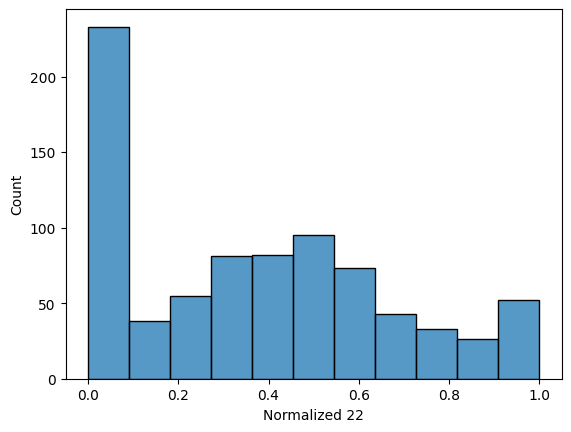

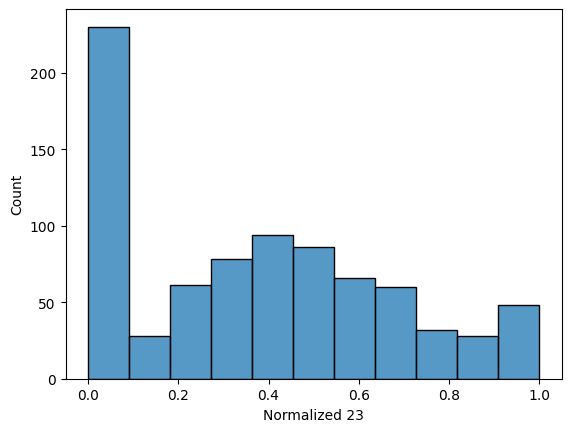

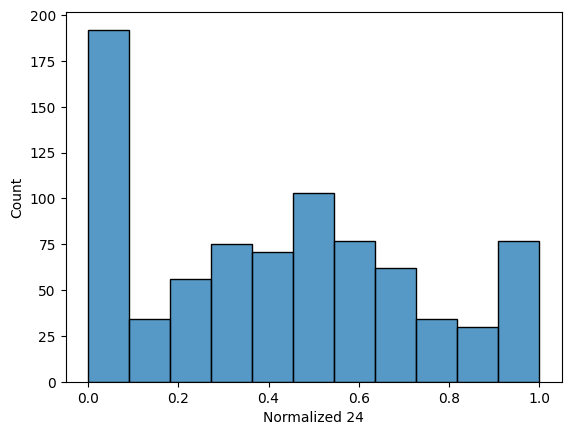

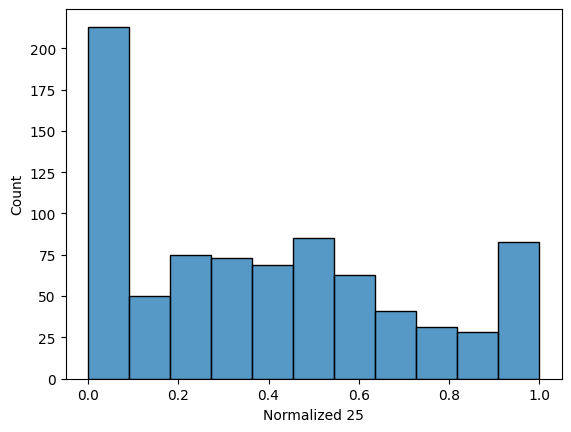

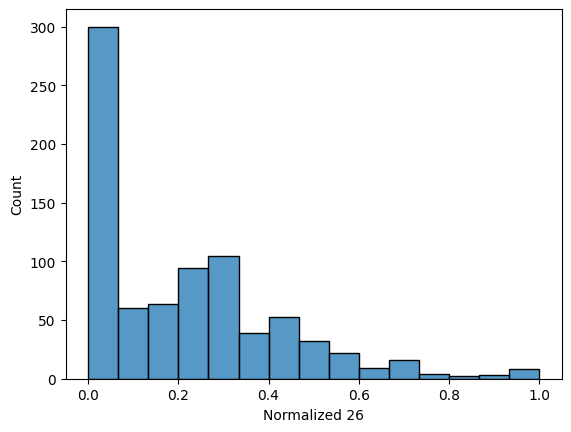

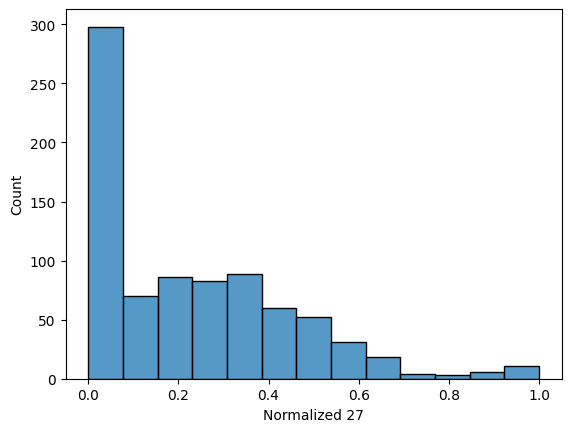

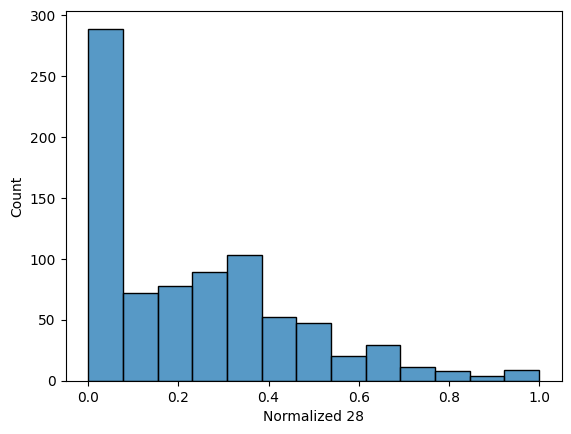

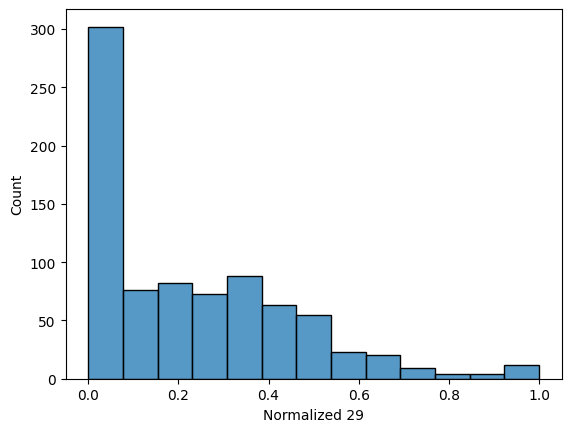

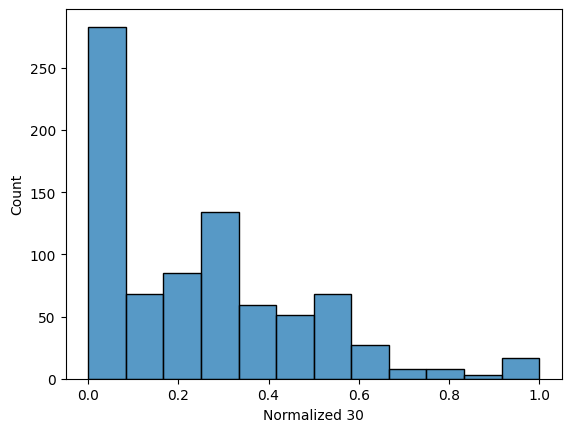

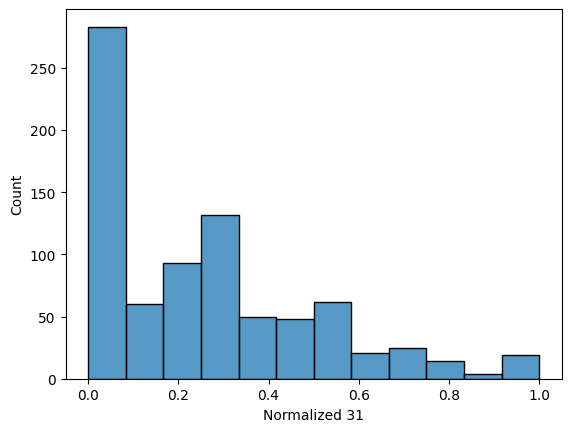

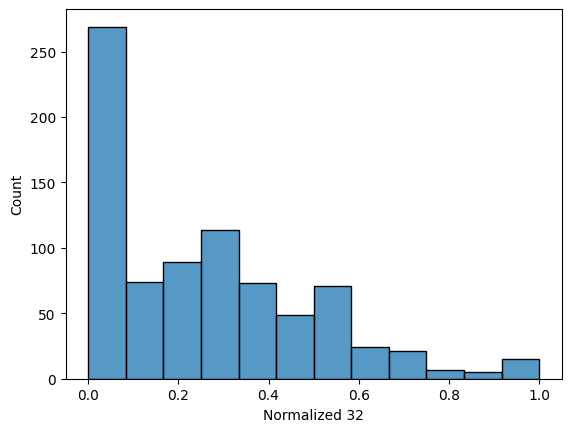

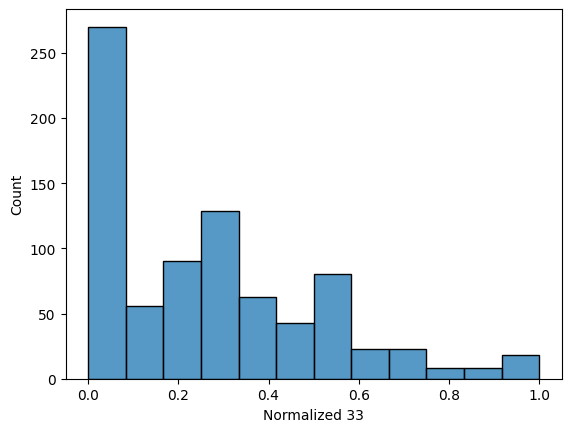

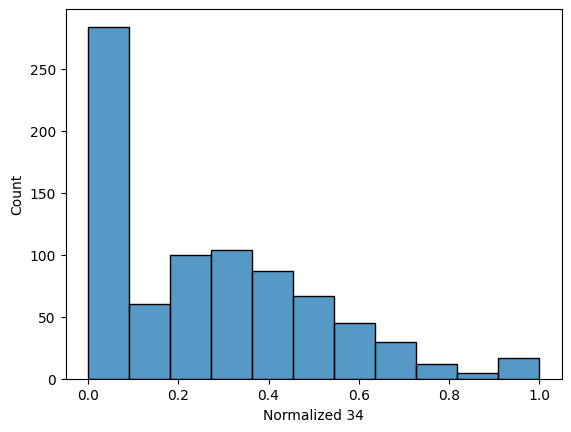

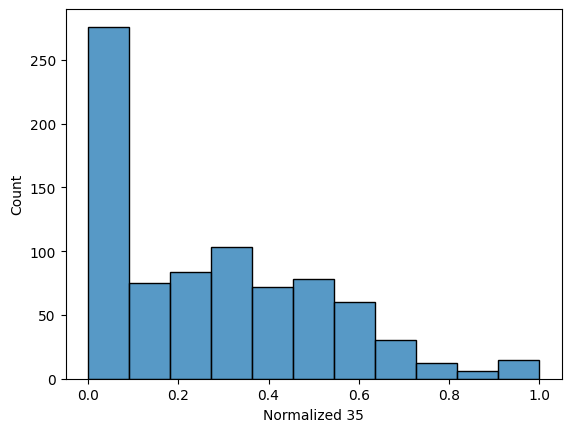

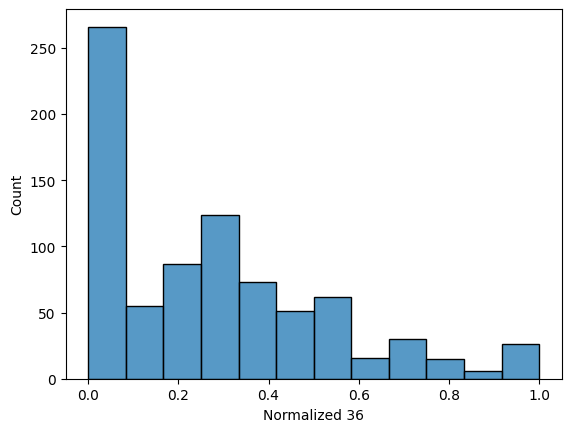

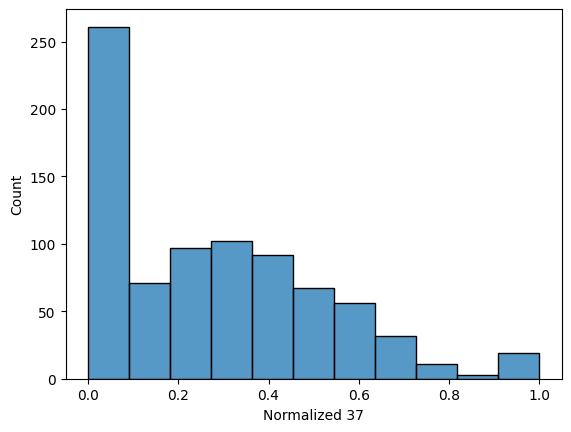

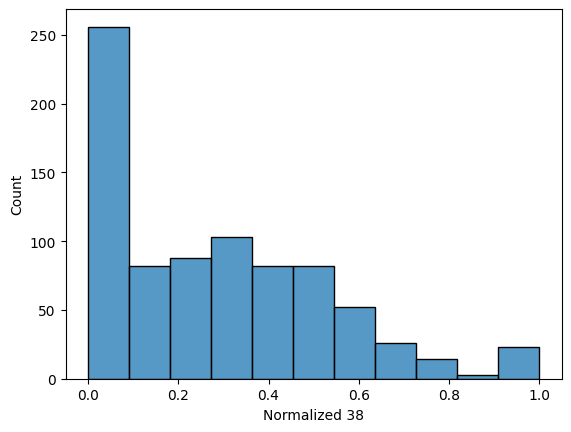

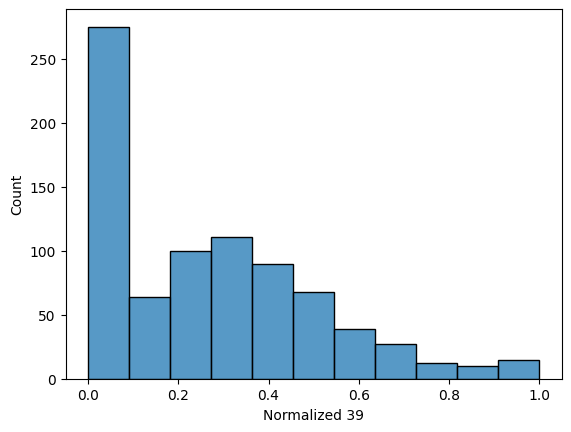

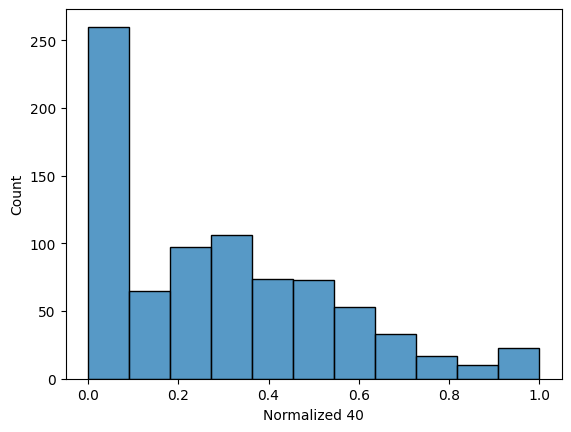

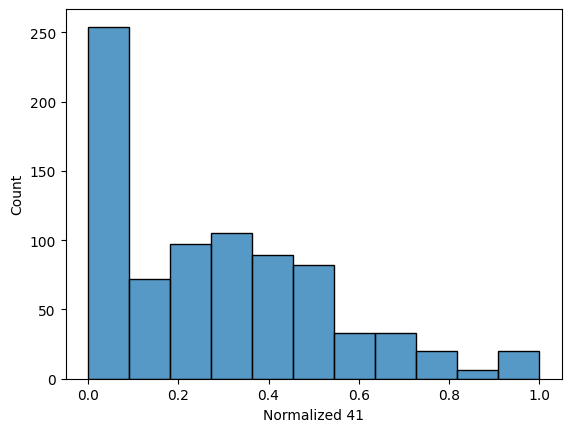

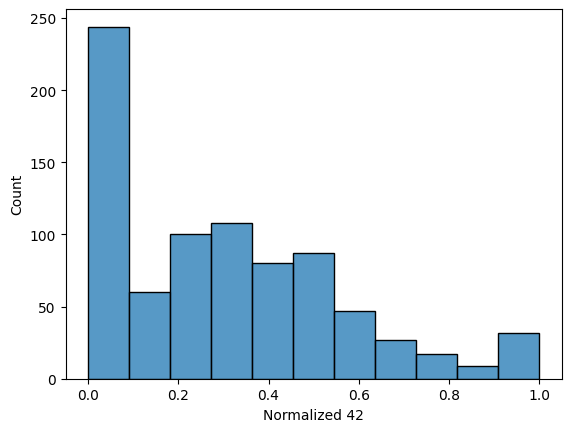

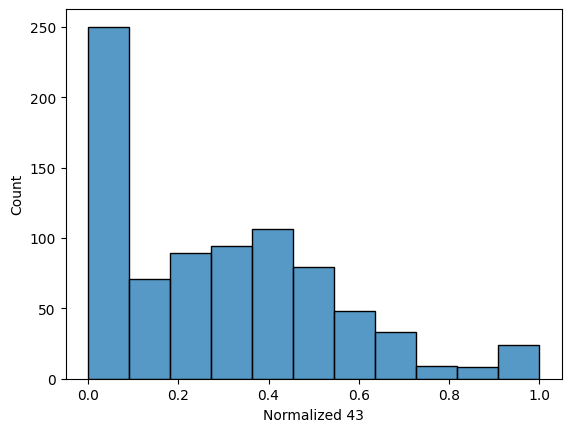

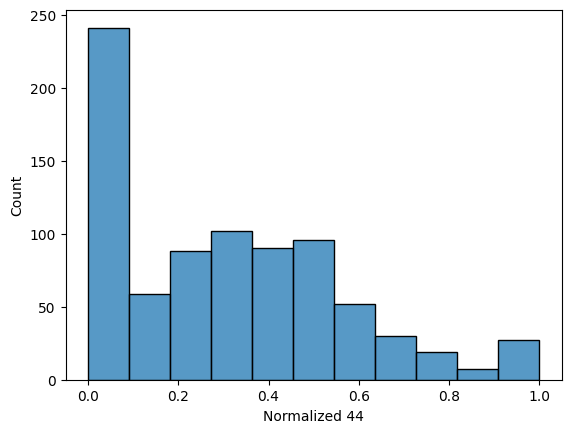

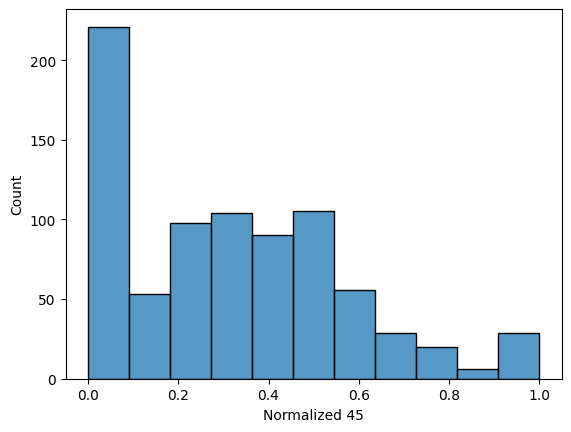

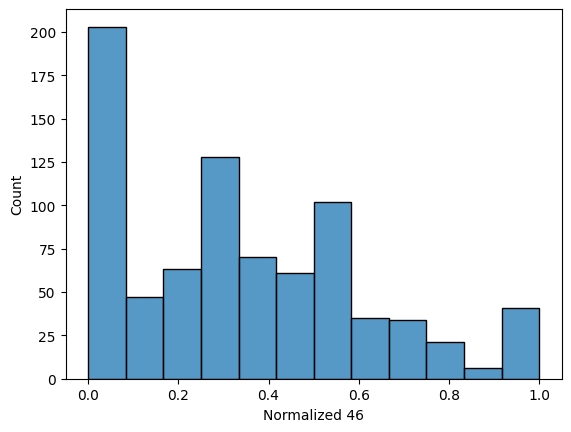

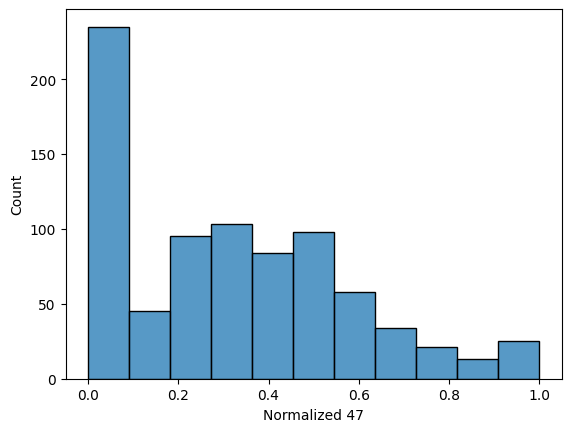

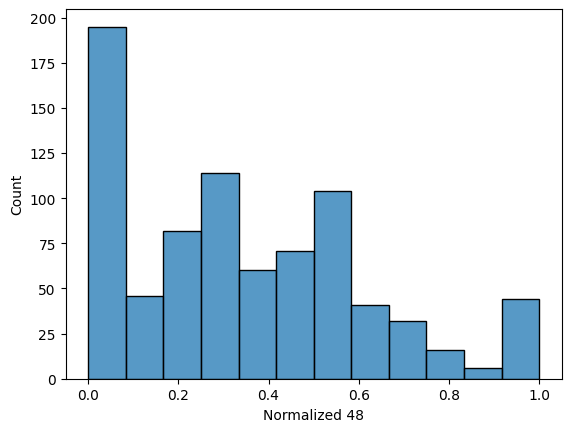

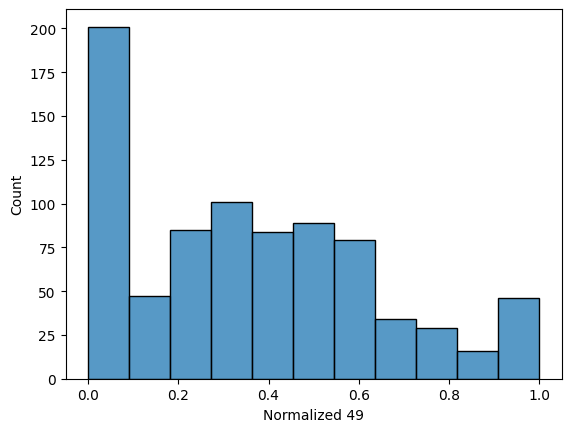

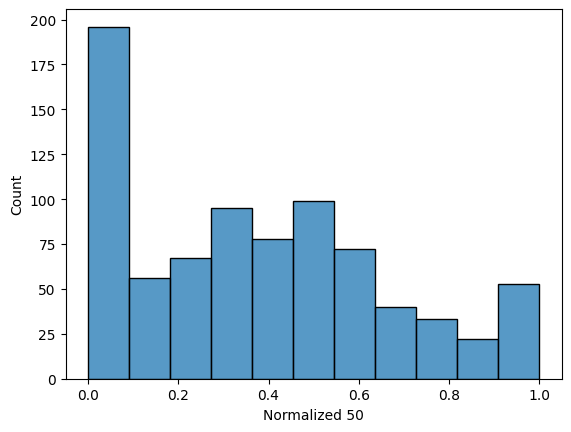

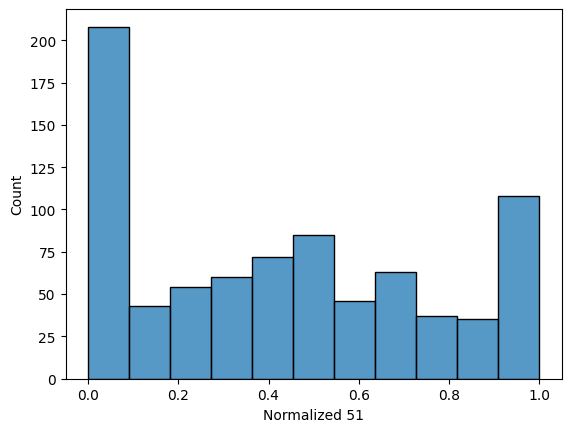

In [33]:
for i in file.select_dtypes(exclude=['object']).columns:
    sbs.histplot(file[i])
    plt.show()

#Removing Outliers:

In [34]:
def remove_outliers(data, threshold=3):
 z_scores=zscore(data)
 outlier= np.abs(z_scores) > threshold
 cleaned_data = data[~outlier]
 return cleaned_data

In [35]:
print("Columns after removing Outliers:")
remove_outliers(file.select_dtypes(include=['int','float']))

Columns after removing Outliers:


W0    W1    W2    W3    W4    W5    W6    W7    W8    W9  ...  \
0    11.0  12.0  10.0   8.0  13.0  12.0  14.0  21.0   6.0  14.0  ...   
1     7.0   6.0   3.0   2.0   7.0   1.0   6.0   3.0   3.0   3.0  ...   
2     7.0  11.0   8.0   9.0  10.0   8.0   7.0  13.0  12.0   6.0  ...   
3    12.0   8.0  13.0   5.0   9.0   6.0   9.0  13.0  13.0  11.0  ...   
4     8.0   5.0  13.0  11.0   6.0   7.0   9.0  14.0   9.0   9.0  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
806   0.0   0.0   1.0   0.0   0.0   2.0   1.0   0.0   0.0   1.0  ...   
807   0.0   1.0   0.0   0.0   1.0   2.0   2.0   6.0   0.0   1.0  ...   
808   1.0   0.0   0.0   0.0   1.0   1.0   2.0   1.0   1.0   0.0  ...   
809   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   
810   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

     Normalized 42  Normalized 43  Normalized 44  Normalized 45  \
0             0.06           0.22           0.28           0.39   
1             0.20           0.40           0.50           0.10   
2             0.27           1.00           0.18           0.18   
3             0.41           0.47           0.06           0.12   
4             0.27           0.53           0.27           0.60   
..             ...            ...            ...            ...   
806           0.00           0.33           0.33           0.00   
807           0.43           0.43           0.57           0.29   
808           0.50           0.00           0.00           0.50   
809           0.00           0.00           0.00           0.50   
810           0.00           0.00           0.00           0.00   

     Normalized 46  Normalized 47  Normalized 48  Normalized 49  \
0             0.50           0.00           0.22           0.17   
1             0.10           0.40           0.50           0.10   
2             0.36           0.45           1.00           0.45   
3             0.24           0.35           0.71           0.35   
4             0.20           0.20           0.13           0.53   
..             ...            ...            ...            ...   
806           0.00           0.33           0.00           0.00   
807           0.57           0.71           0.71           0.71   
808           0.50           0.00           0.00           0.00   
809           0.50           0.00           0.00           0.00   
810           0.00           0.00           0.00           0.00   

     Normalized 50  Normalized 51  
0             0.11           0.39  
1             0.60           0.00  
2             0.45           0.36  
3             0.29           0.35  
4             0.33           0.40  
..             ...            ...  
806           0.67           0.00  
807           0.86           0.71  
808           1.00           0.75  
809           1.00           0.00  
810           0.00           0.33  

[811 rows x 106 columns]

In [36]:
file.describe()

W0          W1          W2          W3          W4          W5  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.902589    9.129470    9.389642    9.717633    9.574599    9.466091   
std     12.067163   12.564766   13.045073   13.553294   13.095765   12.823195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
75%     12.000000   12.000000   12.000000   13.000000   13.000000   12.500000   
max     54.000000   53.000000   56.000000   59.000000   61.000000   52.000000   

               W6          W7          W8          W9  ...  Normalized 42  \
count  811.000000  811.000000  811.000000  811.000000  ...     811.000000   
mean     9.720099    9.585697    9.784217    9.681874  ...       0.299149   
std     13.347375   13.049138   13.550237   13.137916  ...       0.266993   
min      0.000000    0.000000    0.000000    0.000000  ...       0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...       0.000000   
50%      4.000000    4.000000    4.000000    4.000000  ...       0.280000   
75%     13.000000   12.500000   13.000000   13.000000  ...       0.490000   
max     56.000000   62.000000   63.000000   52.000000  ...       1.000000   

       Normalized 43  Normalized 44  Normalized 45  Normalized 46  \
count     811.000000     811.000000     811.000000     811.000000   
mean        0.287571       0.304846       0.316017       0.334760   
std         0.256630       0.263396       0.262226       0.275203   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.020000       0.085000   
50%         0.270000       0.300000       0.310000       0.330000   
75%         0.450000       0.500000       0.500000       0.500000   
max         1.000000       1.000000       1.000000       1.000000   

       Normalized 47  Normalized 48  Normalized 49  Normalized 50  \
count     811.000000      811.00000     811.000000     811.000000   
mean        0.314636        0.33815       0.358903       0.373009   
std         0.266029        0.27569       0.286665       0.295197   
min         0.000000        0.00000       0.000000       0.000000   
25%         0.000000        0.10500       0.100000       0.110000   
50%         0.310000        0.33000       0.330000       0.350000   
75%         0.500000        0.50000       0.550000       0.560000   
max         1.000000        1.00000       1.000000       1.000000   

       Normalized 51  
count     811.000000  
mean        0.427941  
std         0.342360  
min         0.000000  
25%         0.090000  
50%         0.430000  
75%         0.670000  
max         1.000000  

[8 rows x 106 columns]

#Scatter Plot:

I have choosen Week5 & Week 18 randomly:

Text(0.5, 1.0, 'SALES_TRANSACTION_DATA')

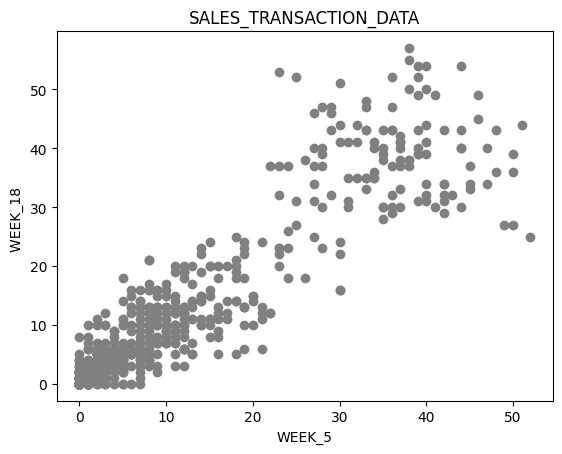

In [37]:
plt.scatter(file['W5'],file['W18'],color='grey')
plt.xlabel('WEEK_5')
plt.ylabel('WEEK_18 ')
plt.title('SALES_TRANSACTION_DATA')

#K-Means Clustering:

In [38]:
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(file.select_dtypes(exclude=['object']))

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster labels and centers
for i in range(k):
    cluster_data = file[labels == i]
    cluster_center = centers[i]
    print(f"Cluster {i+1} - Center: {cluster_center}, Size: {len(cluster_data)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 - Center: [11.93401015 11.72588832 11.88324873 12.02030457 12.35532995 12.49746193
 12.23350254 12.08629442 12.54822335 12.37055838 12.36548223 12.97461929
 12.5177665  12.26395939 12.44670051 12.82233503 12.90862944 13.06598985
 12.6751269  12.6142132  12.75126904 12.83756345 13.37055838 13.43654822
 15.3857868  14.39086294  8.71573604  9.13705584  9.03045685  8.97461929
  9.35532995  9.5177665   9.66497462  9.71573604 10.14213198 10.21319797
  9.69543147 10.2284264  10.13705584  9.80203046  9.89847716 10.25380711
 10.1928934  10.29441624 10.47715736 10.42639594 10.57360406 10.99492386
 11.30964467 11.83756345 12.93908629 14.28426396  4.02030457 21.94416244
  0.45126904  0.43862944  0.45654822  0.45670051  0.47573604  0.48771574
  0.47756345  0.46725888  0.48532995  0.47538071  0.48385787  0.51451777
  0.48756345  0.46700508  0.48446701  0.50177665  0.50411168  0.51172589
  0.49040609  0.48020305  0.48700508  0.49279188  0.51649746  0.51791878
  0.61324873  0.56548223  0.278

#Visualization of K-Mean:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


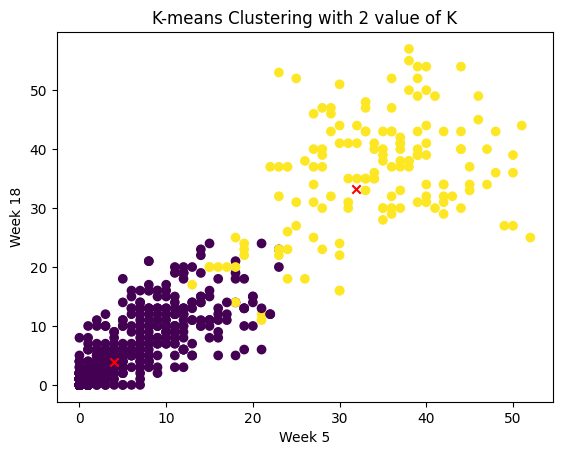

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


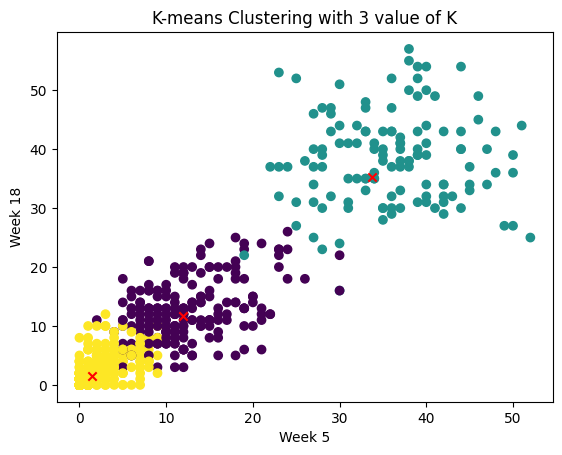

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


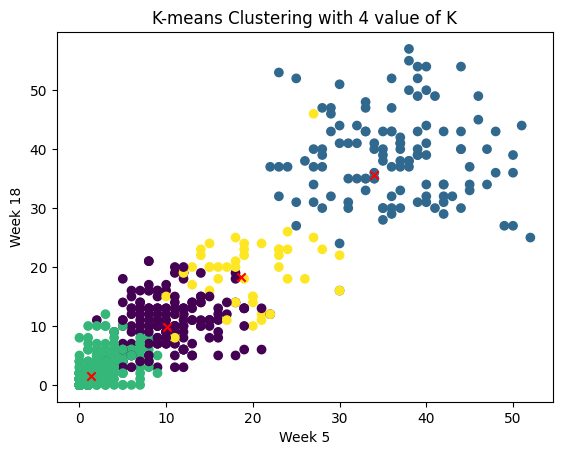

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


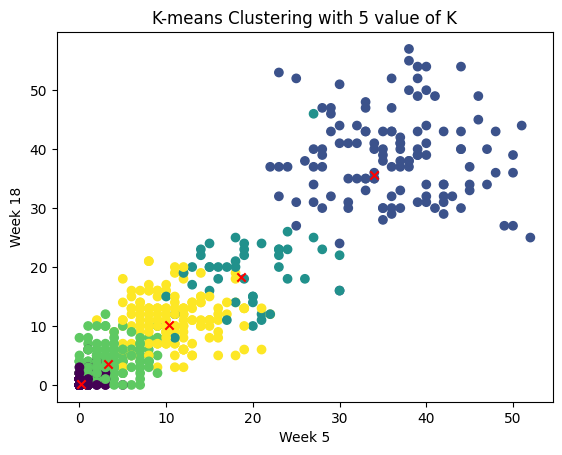

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


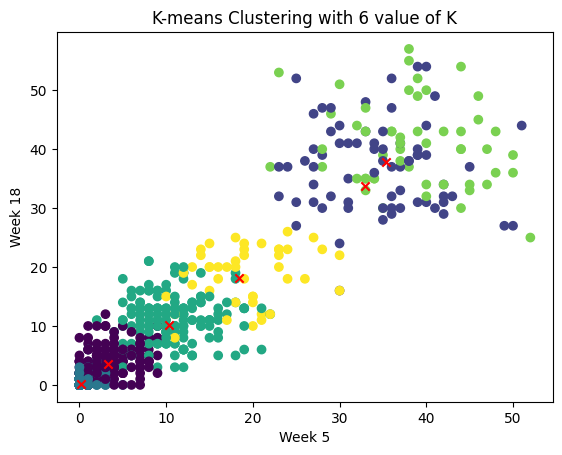

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


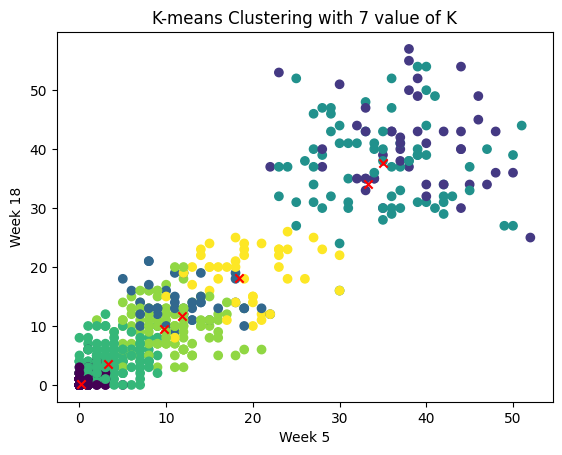

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


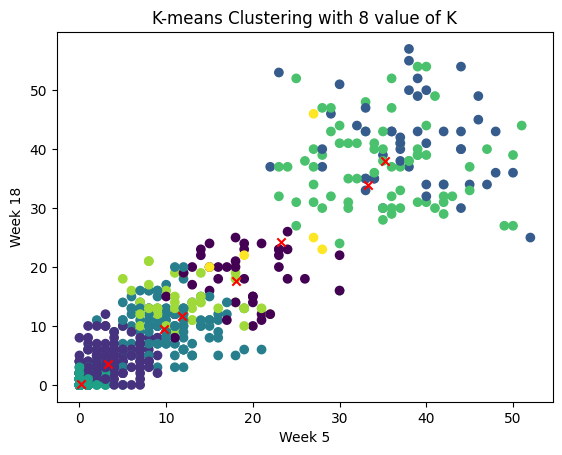

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


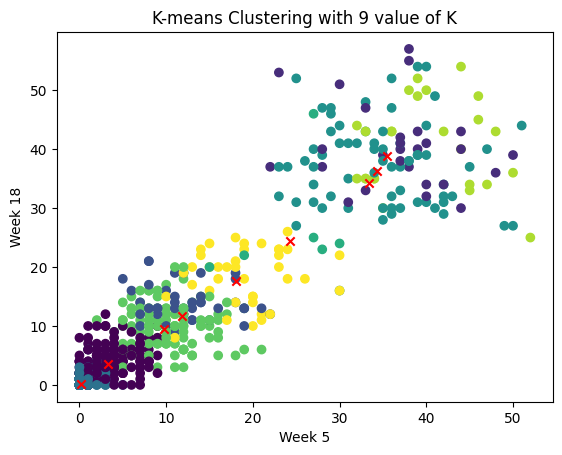

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


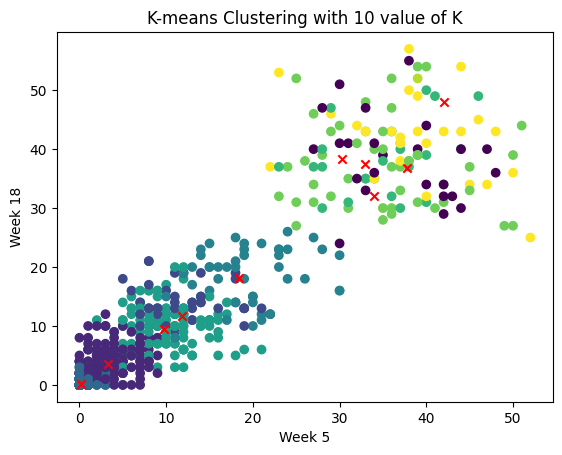

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


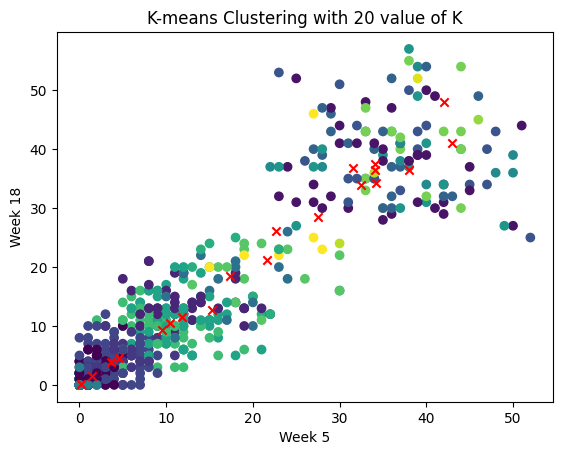

In [39]:
K = [2,3,4,5,6,7,8,9,10,20]  # Number of clusters
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(file.select_dtypes(exclude=['object']))
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    plt.scatter(file['W5'], file['W18'], c=labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
    plt.xlabel('Week 5')
    plt.ylabel('Week 18')
    plt.title('K-means Clustering with '+ str(i)+ ' value of K')
    plt.show()

Liner Regression:

In [40]:
xn= np.array(file.W5)
yn= np.array(file.W18)
n=len(xn)
xn_mean = xn.mean()
yn_mean = yn.mean()
sum_xn = (xn).sum()
sum_yn = (yn).sum()
sum_xnyn = ((xn*yn).sum())*n
print(sum_xnyn)
sum_xn_sum_yn = sum_xn*sum_yn
sum_xnxn = ((xn*xn).sum())*n
print(sum_xnxn)
sum_xn_Square = sum_xn*sum_xn
slp = (sum_xnyn- sum_xn_sum_yn) / (sum_xnxn-sum_xn_Square)
print("Slope=" , slp)
Intcp = yn_mean - slp * xn_mean
print("Intercept=" ,Intcp)

168155984
166954893
Slope= 0.97991908131643
Intercept= 0.7313948369097005


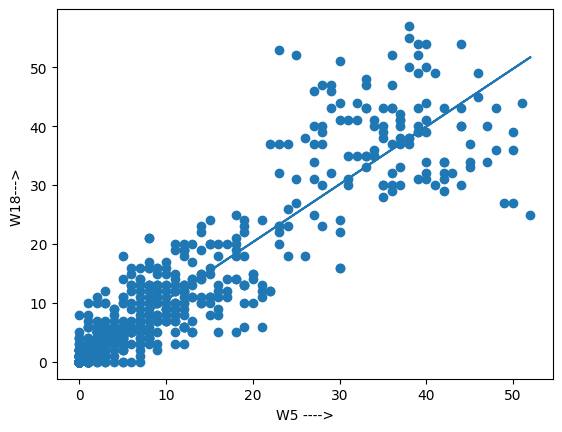

In [41]:
plt.xlabel("W5 ---->")
plt.scatter(file.W5,file.W18)
plt.ylabel("W18---> ")
plt.plot(xn,slp*xn+Intcp)
plt.show()

Linear Regression General Form For Only One Independent Feature/Variable:

Y=mx+c.


where x=independent feature,Y=Predicted Y

m=slop , c=intercept

#K-Means CLustering With Features Scaling:

In [45]:
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(file.select_dtypes(exclude=['object'])))
scaled.columns=file.select_dtypes(exclude=['object']).columns
scaled.columns

Index(['W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=106)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


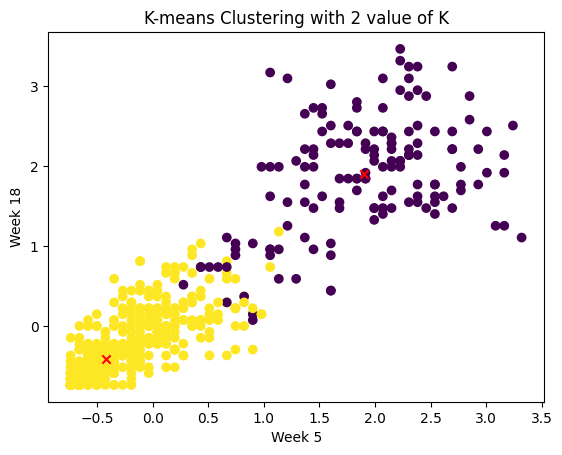

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


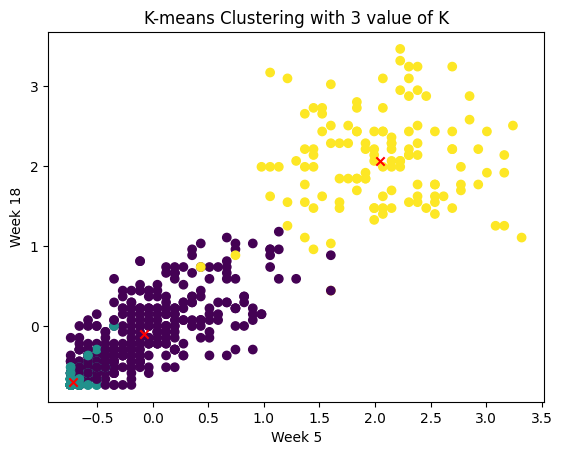

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


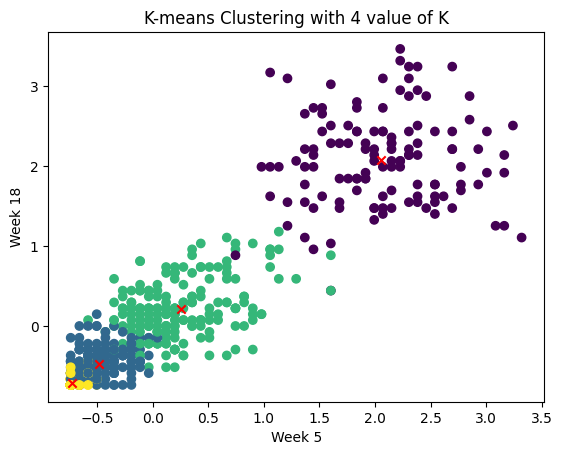

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


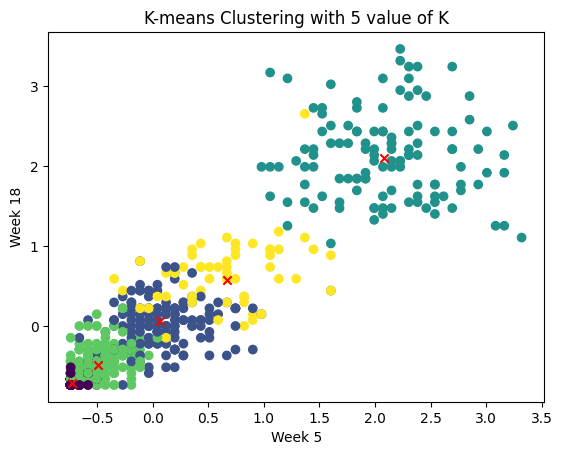

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


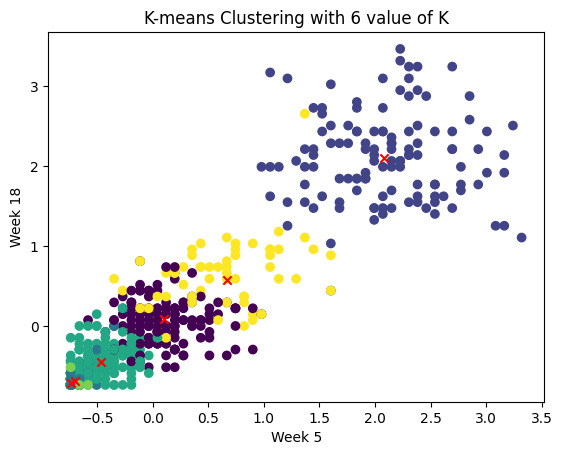

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


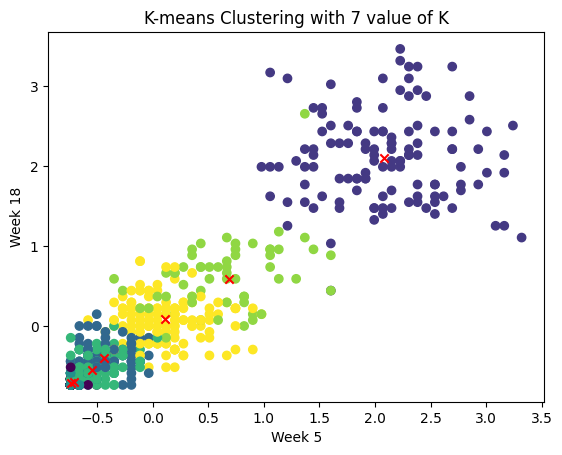

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


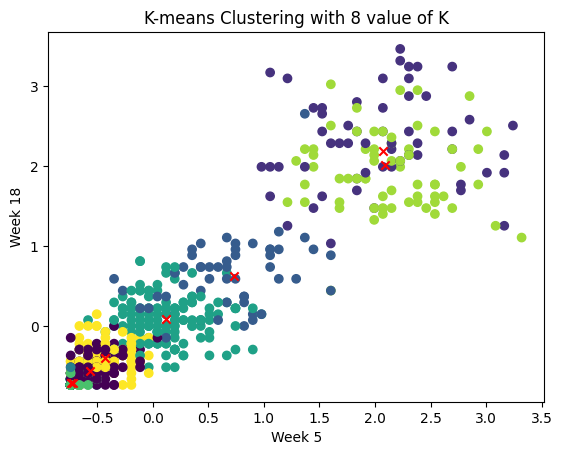

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


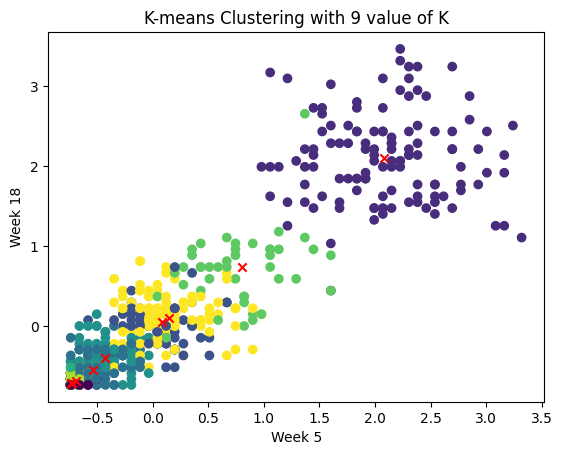

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


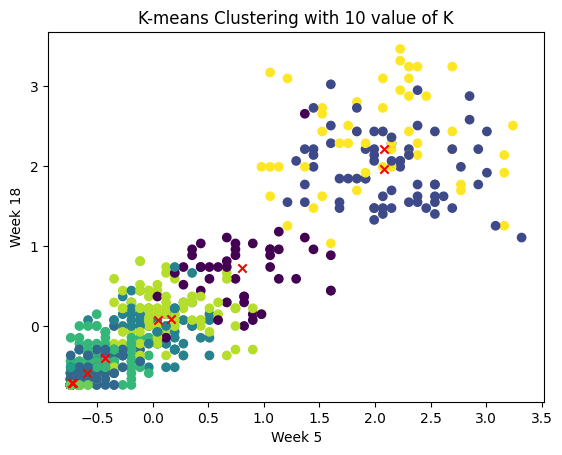

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


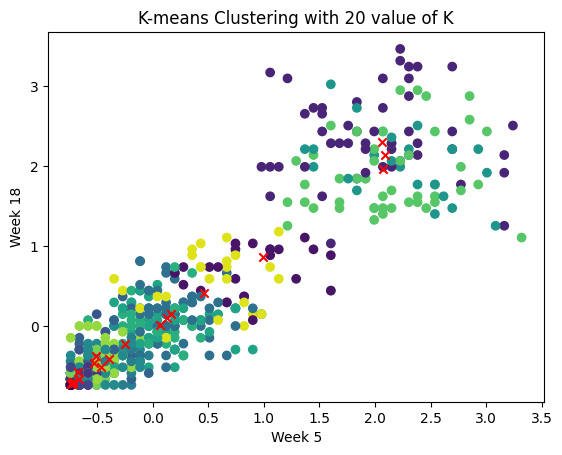

In [46]:
K = [2,3,4,5,6,7,8,9,10,20]  # Number of clusters
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    plt.scatter(scaled['W5'], scaled['W18'], c=labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
    plt.xlabel('Week 5')
    plt.ylabel('Week 18')
    plt.title('K-means Clustering with '+ str(i)+ ' value of K')
    plt.show()

#Liner Regression With Feature Scaling:

In [48]:
xn= np.array(scaled.W5)
yn= np.array(scaled.W18)
n=len(xn)
xn_mean = xn.mean()
yn_mean = yn.mean()
sum_xn = (xn).sum()
sum_yn = (yn).sum()
sum_xnyn = ((xn*yn).sum())*n
print(sum_xnyn)
sum_xn_sum_yn = sum_xn*sum_yn
sum_xnxn = ((xn*xn).sum())*n
print(sum_xnxn)
sum_xn_Square = sum_xn*sum_xn
slp = (sum_xnyn- sum_xn_sum_yn) / (sum_xnxn-sum_xn_Square)
print("Slope=" , slp)
Intcp = yn_mean - slp * xn_mean
print("Intercept=" ,Intcp)

609491.9885452681
657721.0
Slope= 0.9266725382727146
Intercept= -3.504526440247103e-17


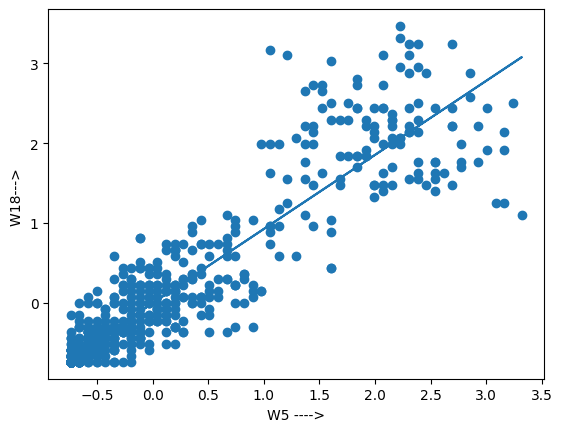

In [50]:
plt.xlabel("W5 ---->")
plt.scatter(scaled.W5,scaled.W18)
plt.ylabel("W18---> ")
plt.plot(xn,slp*xn+Intcp)
plt.show()